# Forecasting bus demand in Banana Republic municipalities

# Forecasting bus demand in Banana Republic municipalities

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
sns.set()

import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing


##  Train-Test Split

In [2]:
df = pd.read_csv('municipality_bus_utilization.csv')

In [ ]:
df.head()

timestamp  municipality_id  usage  total_capacity
0  2017-06-04 07:59:42                9    454            1332
1  2017-06-04 07:59:42                8    556            2947
2  2017-06-04 07:59:42                4   1090            3893
3  2017-06-04 07:59:42                0    204            2813
4  2017-06-04 07:59:42                7    718            2019

In [3]:
from sklearn.impute import SimpleImputer

In [4]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [5]:
df['hour'] = df['timestamp'].dt.hour
df['time'] = df['timestamp'].dt.date

In [6]:
df.hour.unique()

array([ 7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

**there are 10 different hours that are measured**

In [ ]:
df.loc[(df['time'] >= pd.to_datetime("2017-8-5").date())]

timestamp  municipality_id  usage  total_capacity  hour  \
10390 2017-08-05 08:02:03                1    141             397     8   
10391 2017-08-05 08:02:03                6    494            3113     8   
10392 2017-08-05 08:02:03                7    581            2019     8   
10393 2017-08-05 08:02:03                4   1782            3893     8   
10394 2017-08-05 08:02:03                8    453            2947     8   
...                   ...              ...    ...             ...   ...   
13065 2017-08-19 16:30:35                2    548             697    16   
13066 2017-08-19 16:30:35                8   1193            2947    16   
13067 2017-08-19 16:30:35                7   1354            2019    16   
13068 2017-08-19 16:30:35                6   1680            3113    16   
13069 2017-08-19 16:30:35                3   1189            1930    16   

             time  
10390  2017-08-05  
10391  2017-08-05  
10392  2017-08-05  
10393  2017-08-05  
10394  2017-08-05  
...           ...  
13065  2017-08-19  
13066  2017-08-19  
13067  2017-08-19  
13068  2017-08-19  
13069  2017-08-19  

[2680 rows x 6 columns]

**our test data will be our last 2680 rows**

In [7]:
train = df.loc[:10390,:]
test = df.loc[10390:,:]

In [ ]:
train

timestamp  municipality_id  usage  total_capacity  hour  \
0     2017-06-04 07:59:42                9    454            1332     7   
1     2017-06-04 07:59:42                8    556            2947     7   
2     2017-06-04 07:59:42                4   1090            3893     7   
3     2017-06-04 07:59:42                0    204            2813     7   
4     2017-06-04 07:59:42                7    718            2019     7   
...                   ...              ...    ...             ...   ...   
10386 2017-08-02 16:32:54                1    358             397    16   
10387 2017-08-02 16:32:54                4   2152            3893    16   
10388 2017-08-02 16:32:54                2    553             697    16   
10389 2017-08-02 16:32:54                8   1035            2947    16   
10390 2017-08-05 08:02:03                1    141             397     8   

             time  
0      2017-06-04  
1      2017-06-04  
2      2017-06-04  
3      2017-06-04  
4      2017-06-04  
...           ...  
10386  2017-08-02  
10387  2017-08-02  
10388  2017-08-02  
10389  2017-08-02  
10390  2017-08-05  

[10391 rows x 6 columns]

## Dealing with Missing Data

In [8]:
mean_value=train['usage'].mean()
  
# Replace NaNs in column S2 with the
# mean of values in the same column
train['usage'].fillna(value=mean_value, inplace=True)
test['usage'].fillna(value=mean_value, inplace=True)

In [9]:
mean_value=train['total_capacity'].mean()
  
# Replace NaNs in column S2 with the
# mean of values in the same column
train['total_capacity'].fillna(value=mean_value, inplace=True)
test['total_capacity'].fillna(value=mean_value, inplace=True)

##Models

In [10]:
train = train.sort_values(["municipality_id","timestamp"], ascending = (True,True))
test = test.sort_values(["municipality_id","timestamp"], ascending = (True,True))

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:


# Additive Decomposition
result = seasonal_decompose(df['Real_GDP'], model='additive')

plt.rcParams.update({'figure.figsize': (16,10)})
result.plot().suptitle('Additive Decompose', fontsize=14)
plt.show()

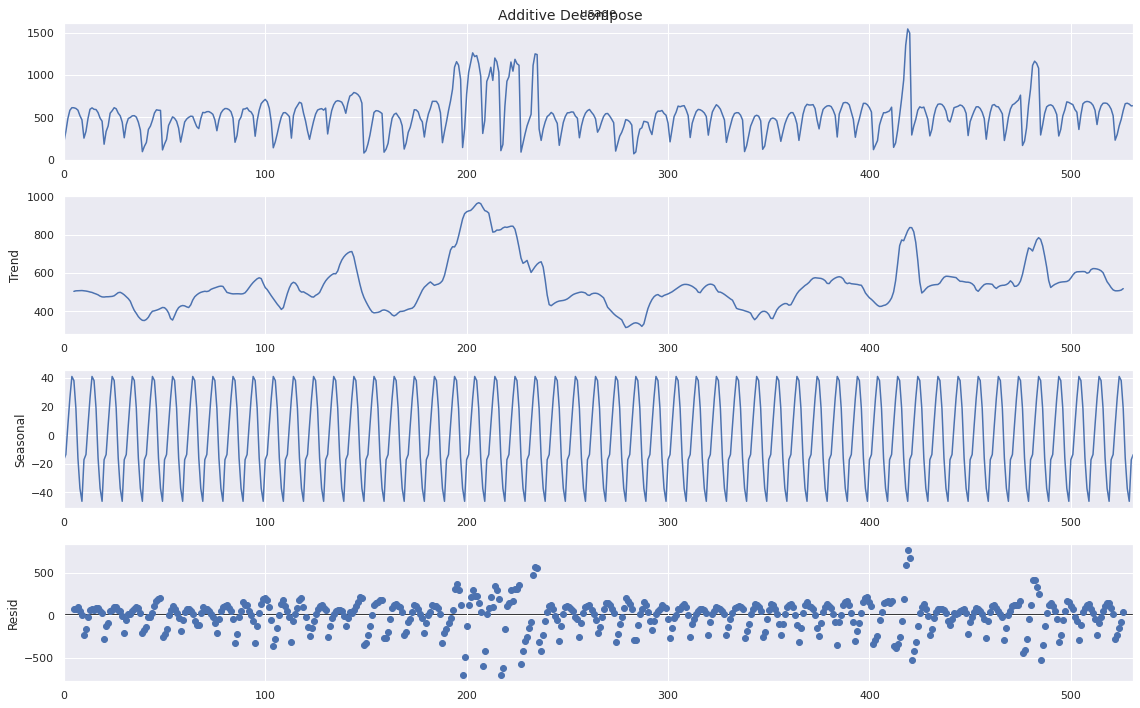

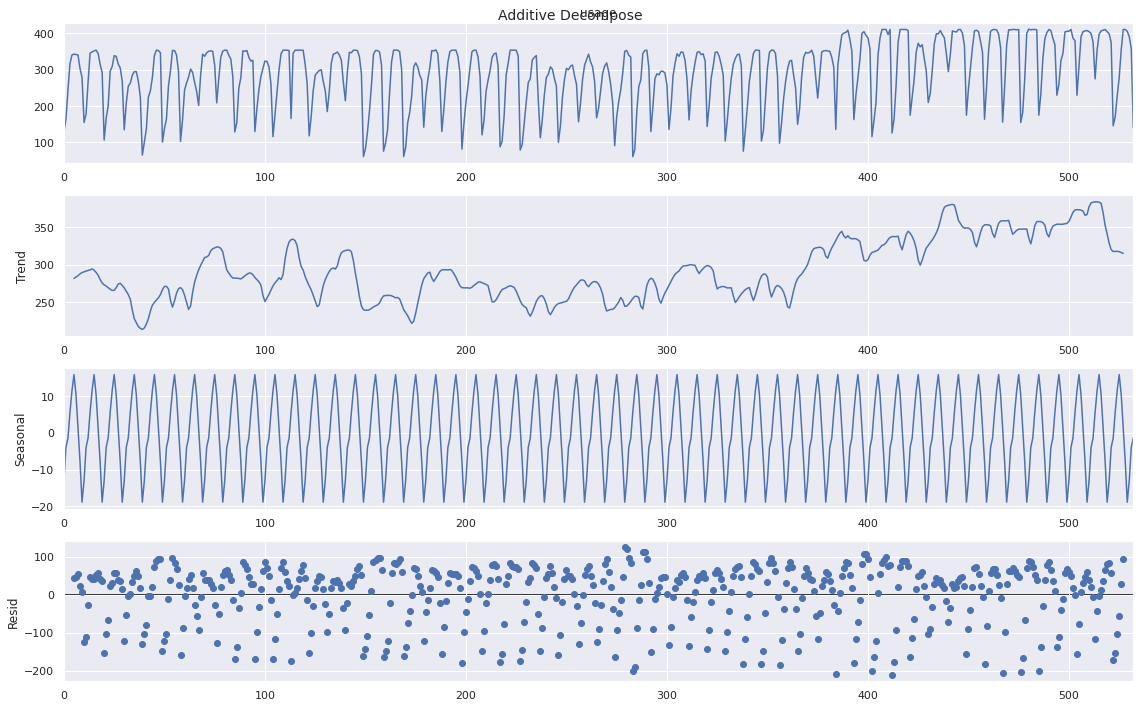

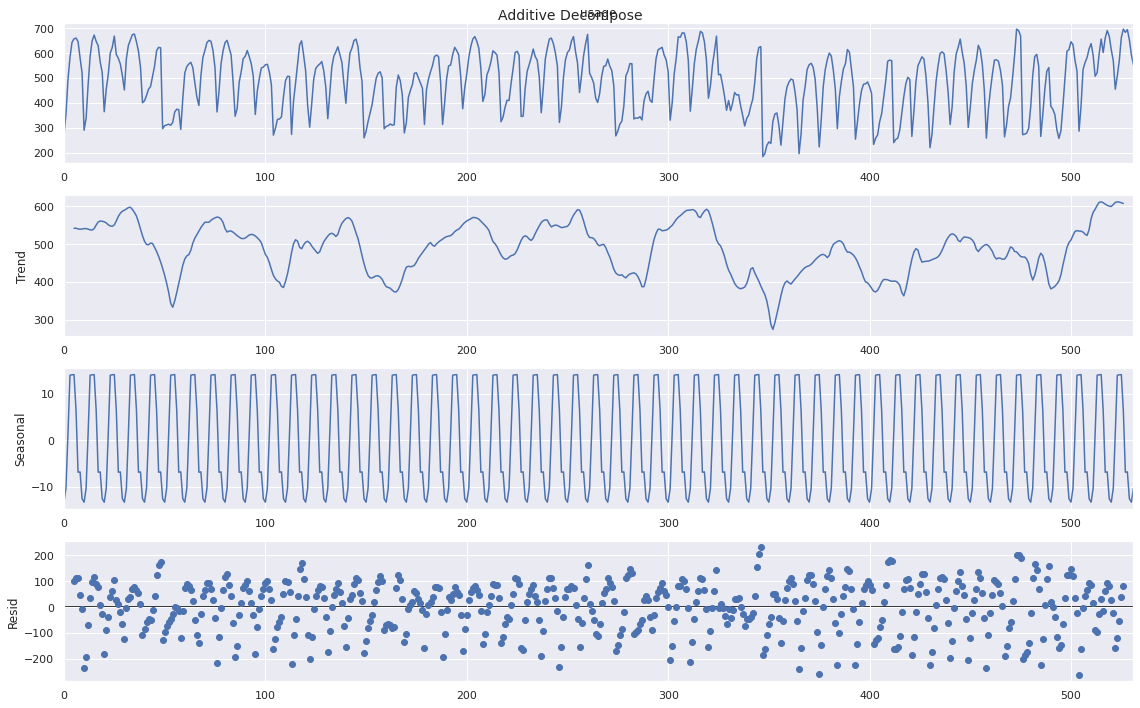

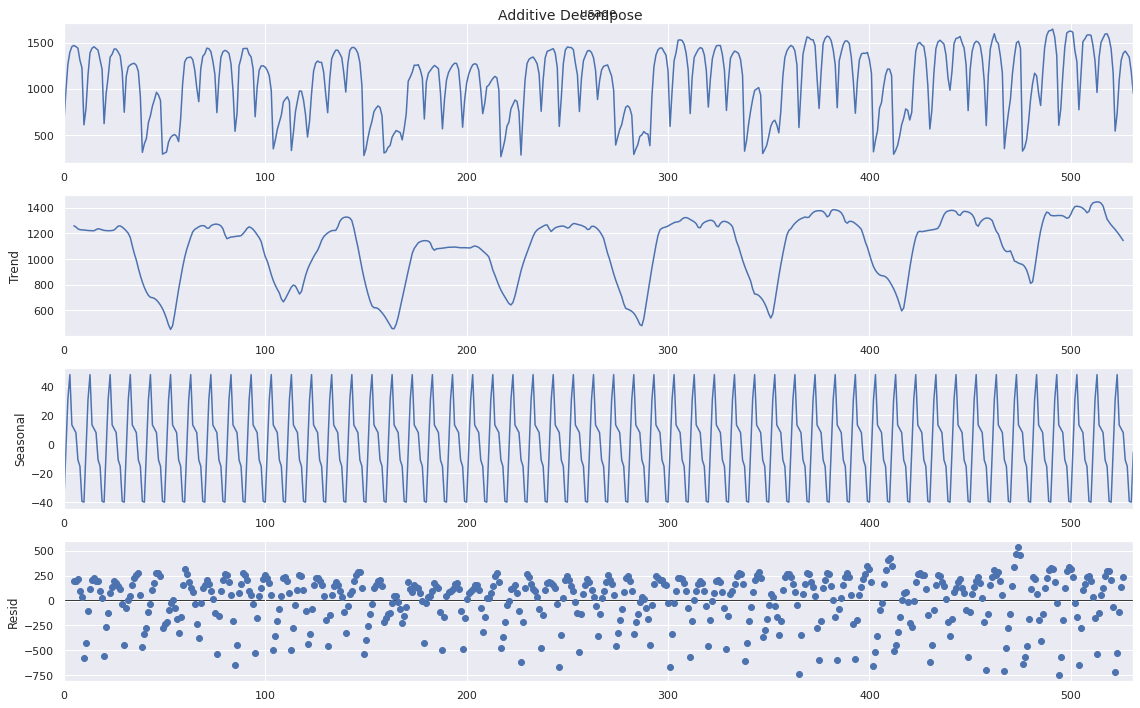

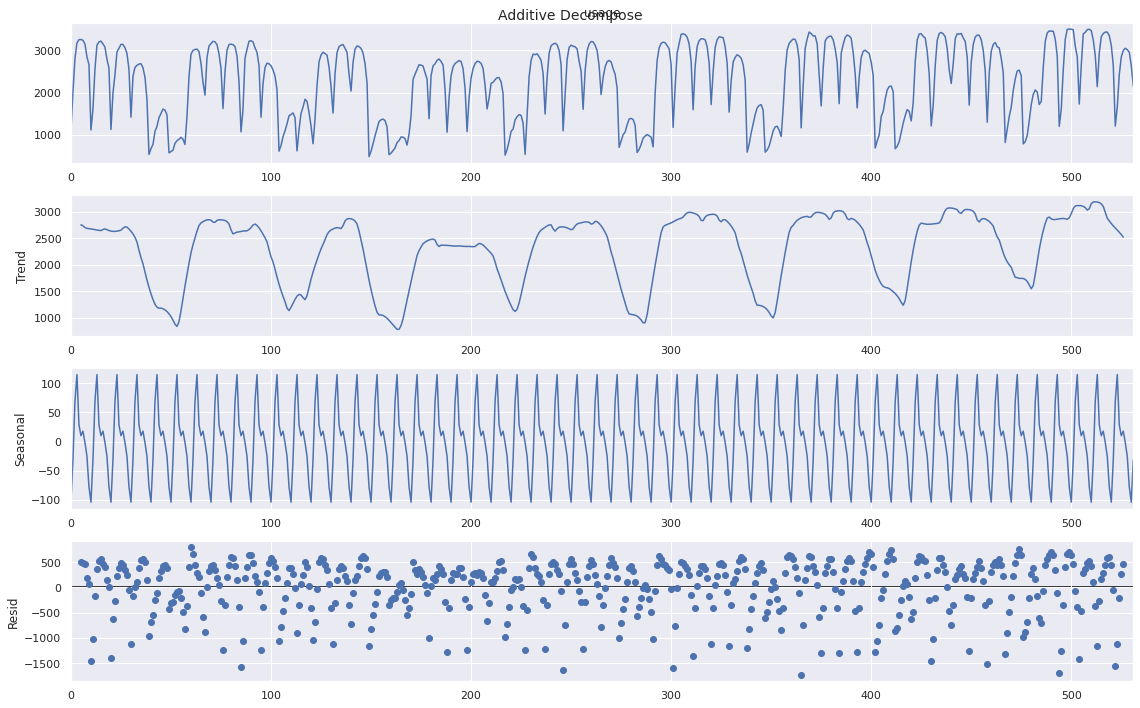

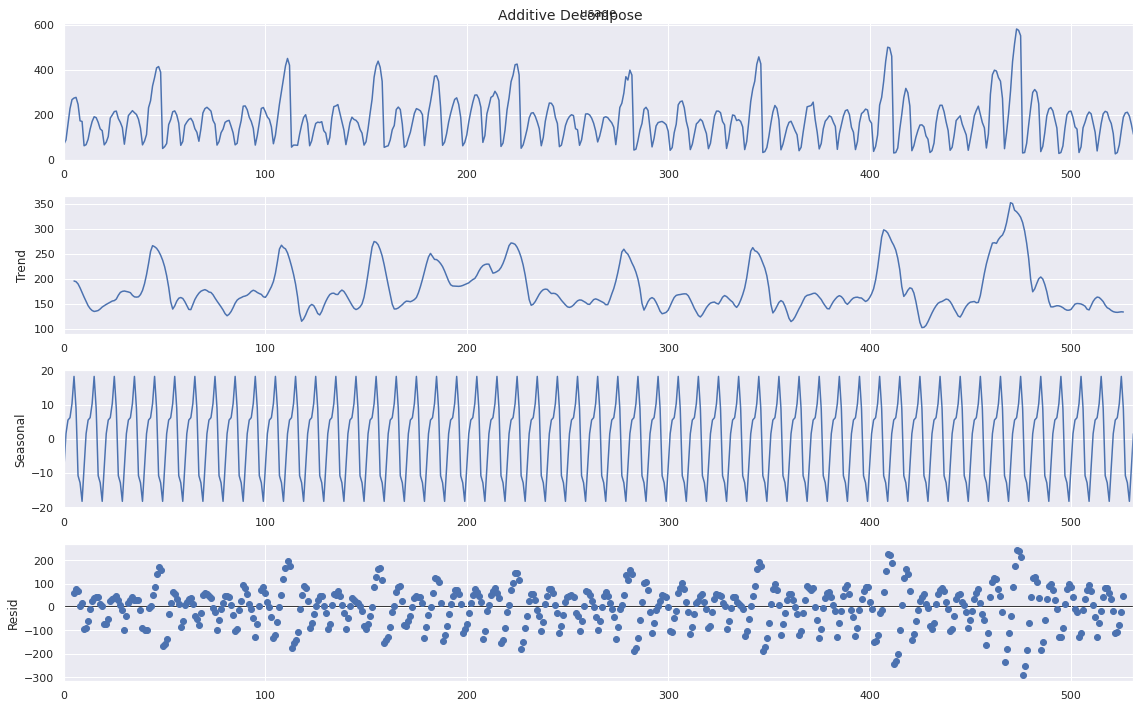

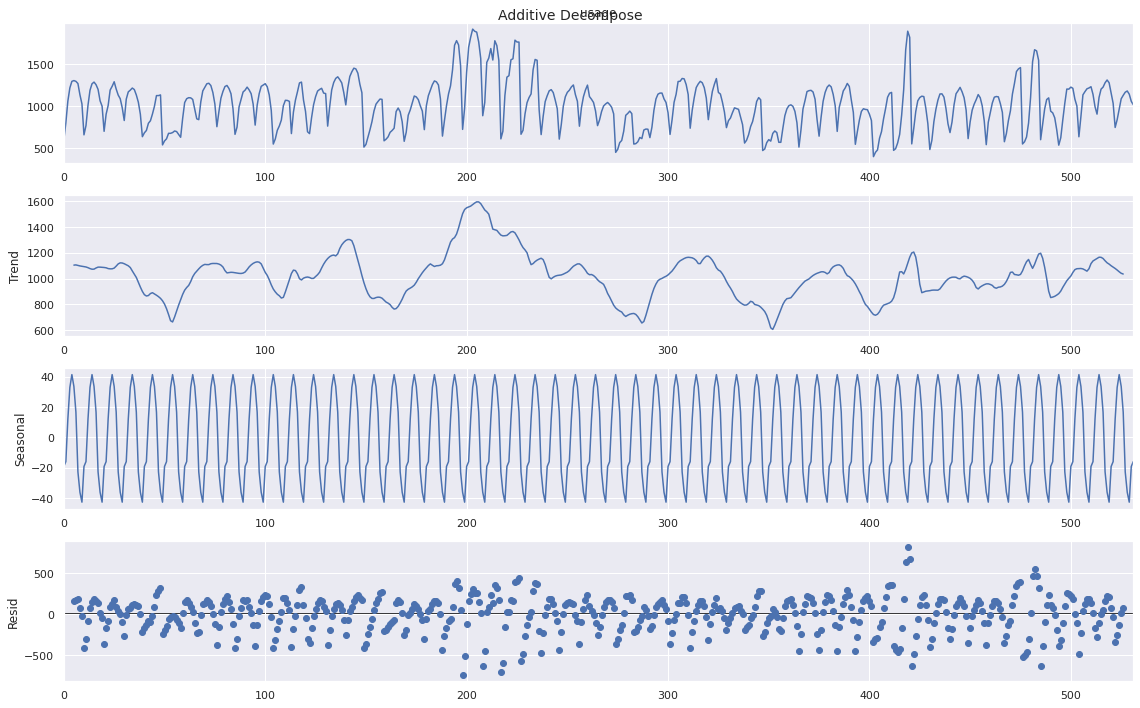

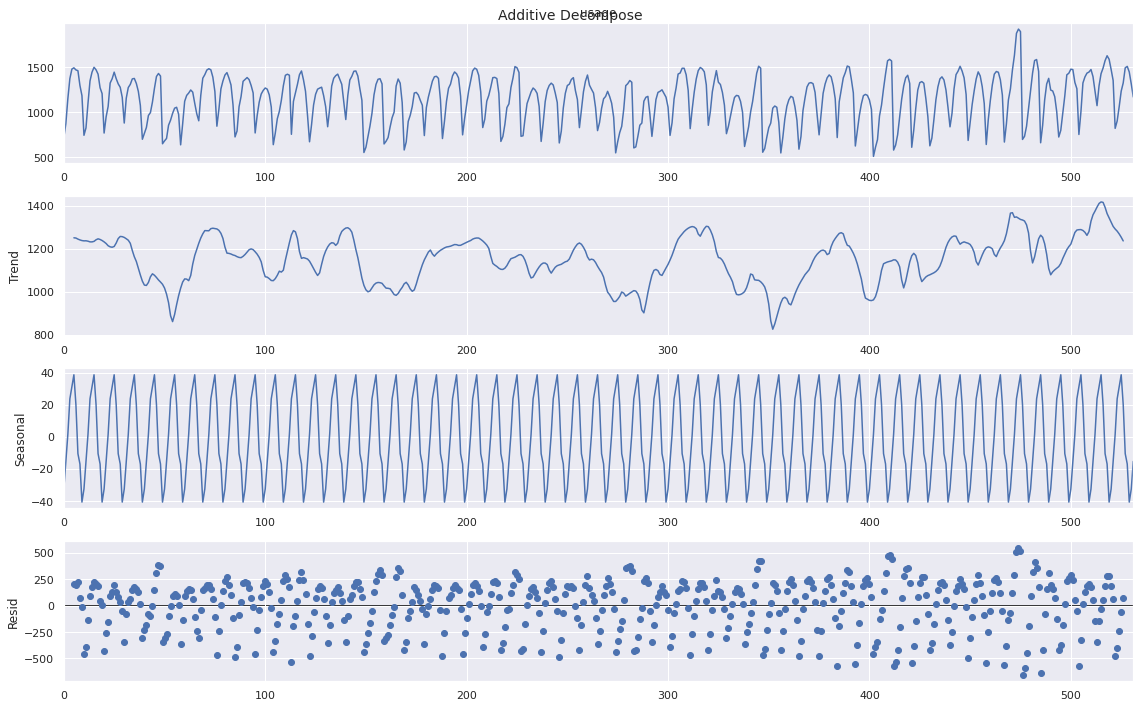

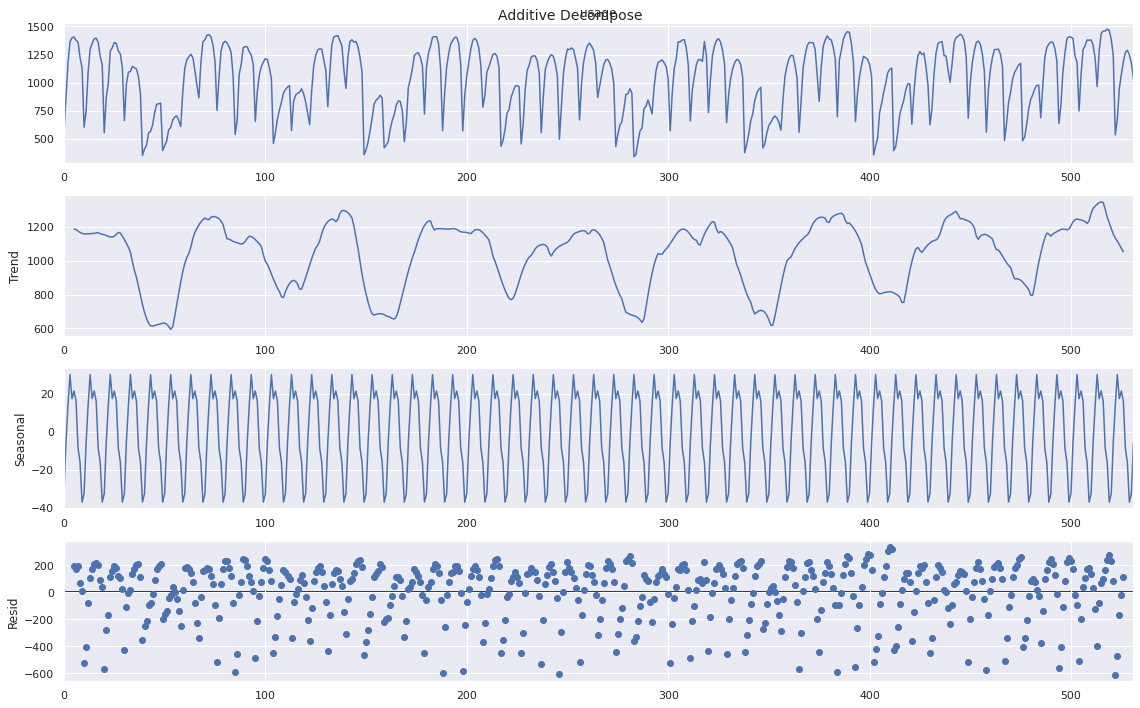

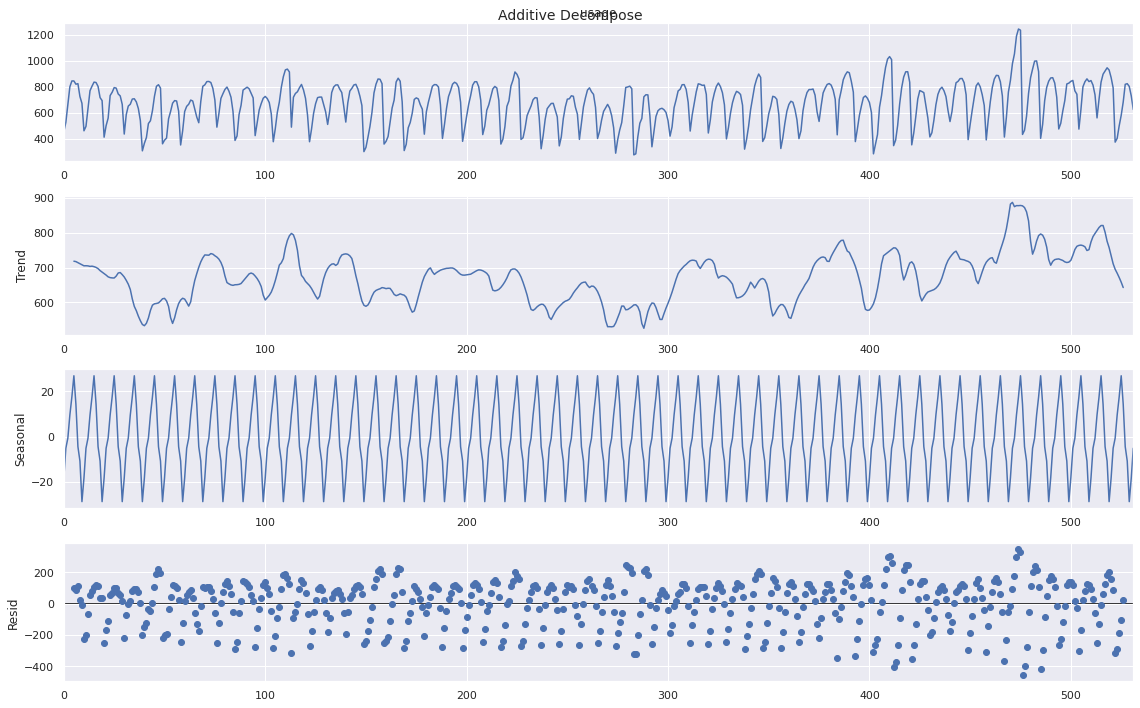

In [ ]:
for i in sorted(df.municipality_id.unique()):
  train_1=train[train['municipality_id']==i]
  test_1=test[test['municipality_id']==i] 
  train_fin = train_1.groupby([pd.Grouper(key='timestamp', freq='H'), 'municipality_id'], as_index=False)['usage'].max()
 # Additive Decomposition
  result = seasonal_decompose(train_fin['usage'], model='additive',period=10)
  plt.rcParams.update({'figure.figsize': (16,10)})
  result.plot().suptitle('Additive Decompose', fontsize=14)
  plt.show()

**We can see that there is no clear trend but strong seasosanilty for different hours in data**

In [ ]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 5.1 MB/s 
     |████████████████████████████████| 9.9 MB 17.3 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [ ]:
import statsmodels.api as sm  
from pmdarima.arima import auto_arima

In [ ]:
for i in sorted(df.municipality_id.unique()):

  train_1=train[train['municipality_id']==i]
  test_1=test[test['municipality_id']==i] 
  train_fin = train_1.groupby([pd.Grouper(key='timestamp', freq='H'), 'municipality_id'], as_index=False)['usage'].max()
  test_fin = test_1.groupby([pd.Grouper(key='timestamp', freq='H'), 'municipality_id'], as_index=False)['usage'].max()
  print(len(test_fin))

142
142
142
142
142
142
142
142
142
142


 RMSE  for :0 is 340.88667488978075
 RMSE  for :1 is 120.36348802928951
 RMSE  for :2 is 132.67035596302398
 RMSE  for :3 is 402.15777017844874
 RMSE  for :4 is 980.444832127537
 RMSE  for :5 is 123.25940865727198
 RMSE  for :6 is 323.0129673690034
 RMSE  for :7 is 319.5503521732958
 RMSE  for :8 is 332.16057510282945
 RMSE  for :9 is 207.54305361816904


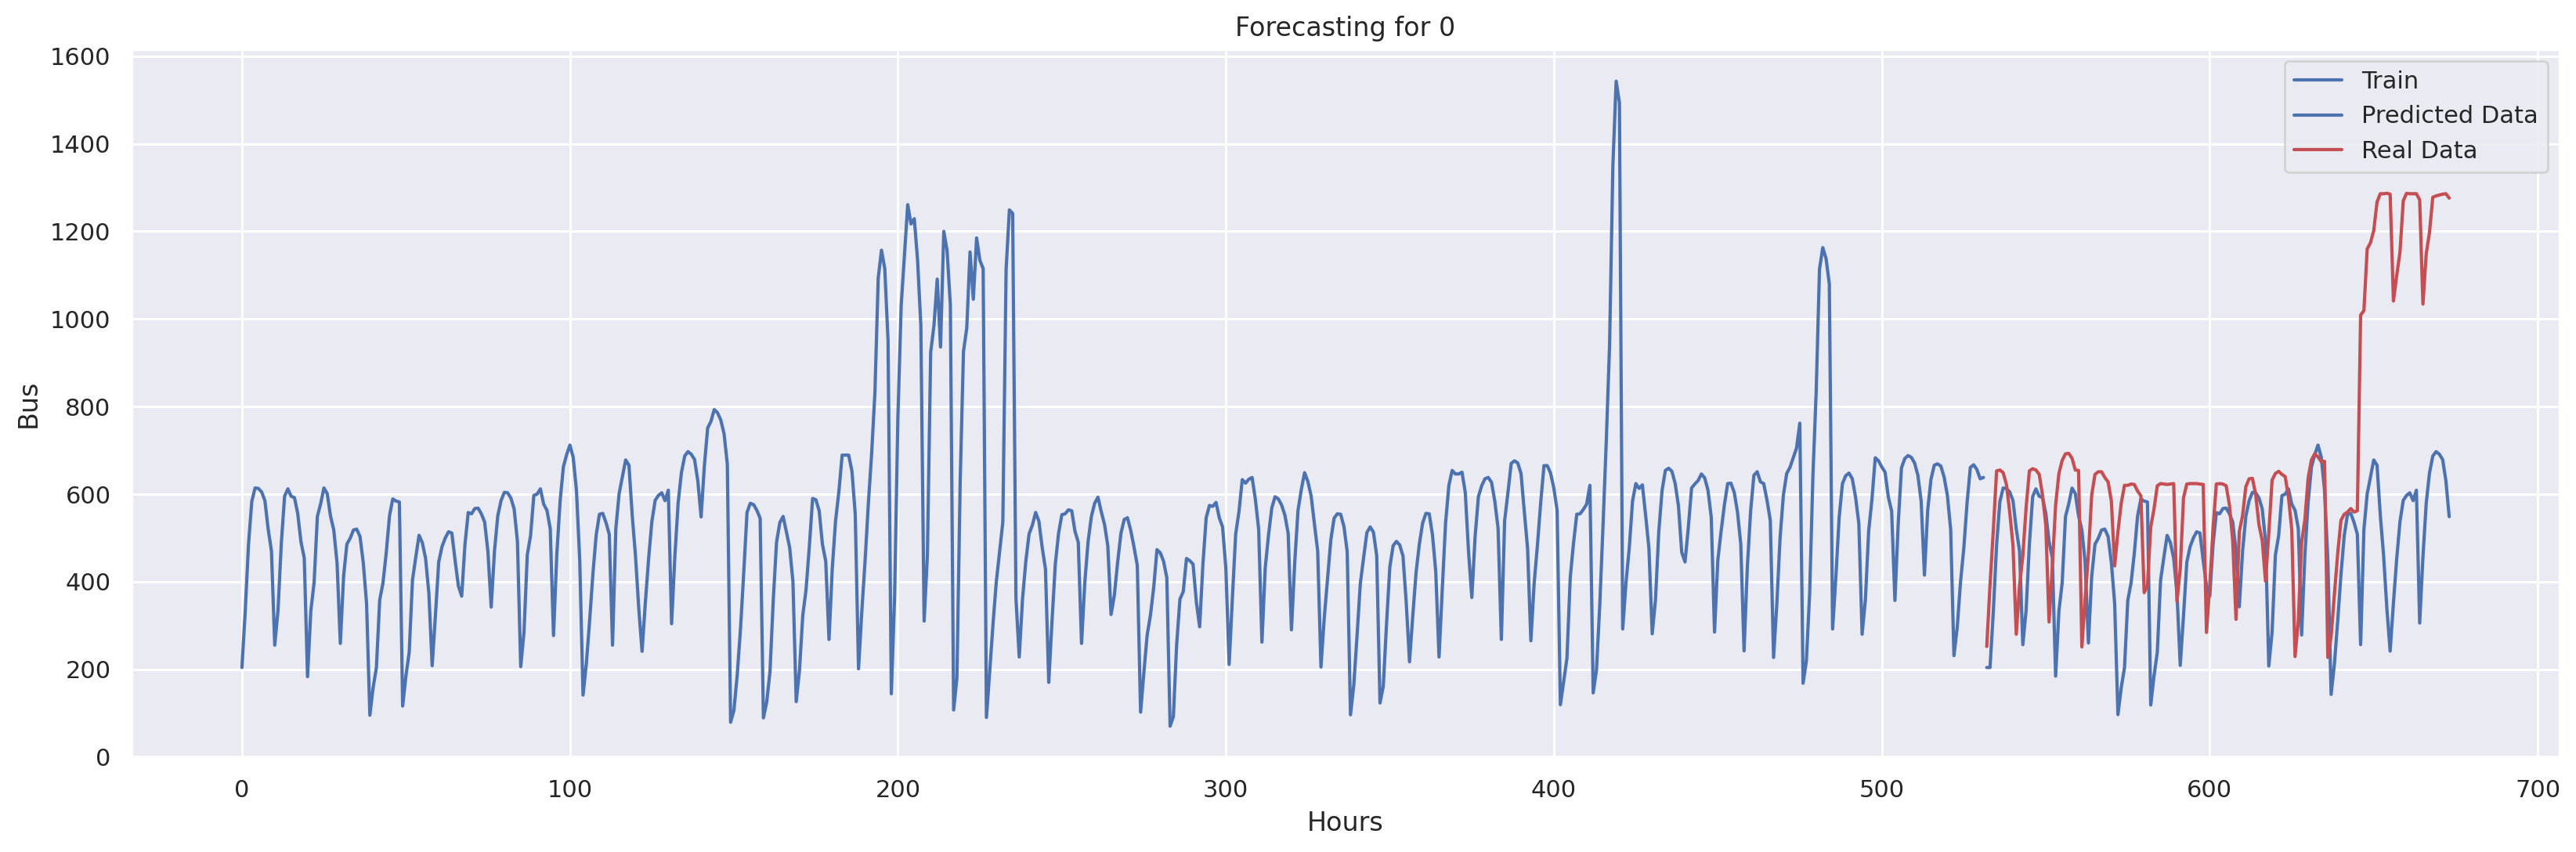

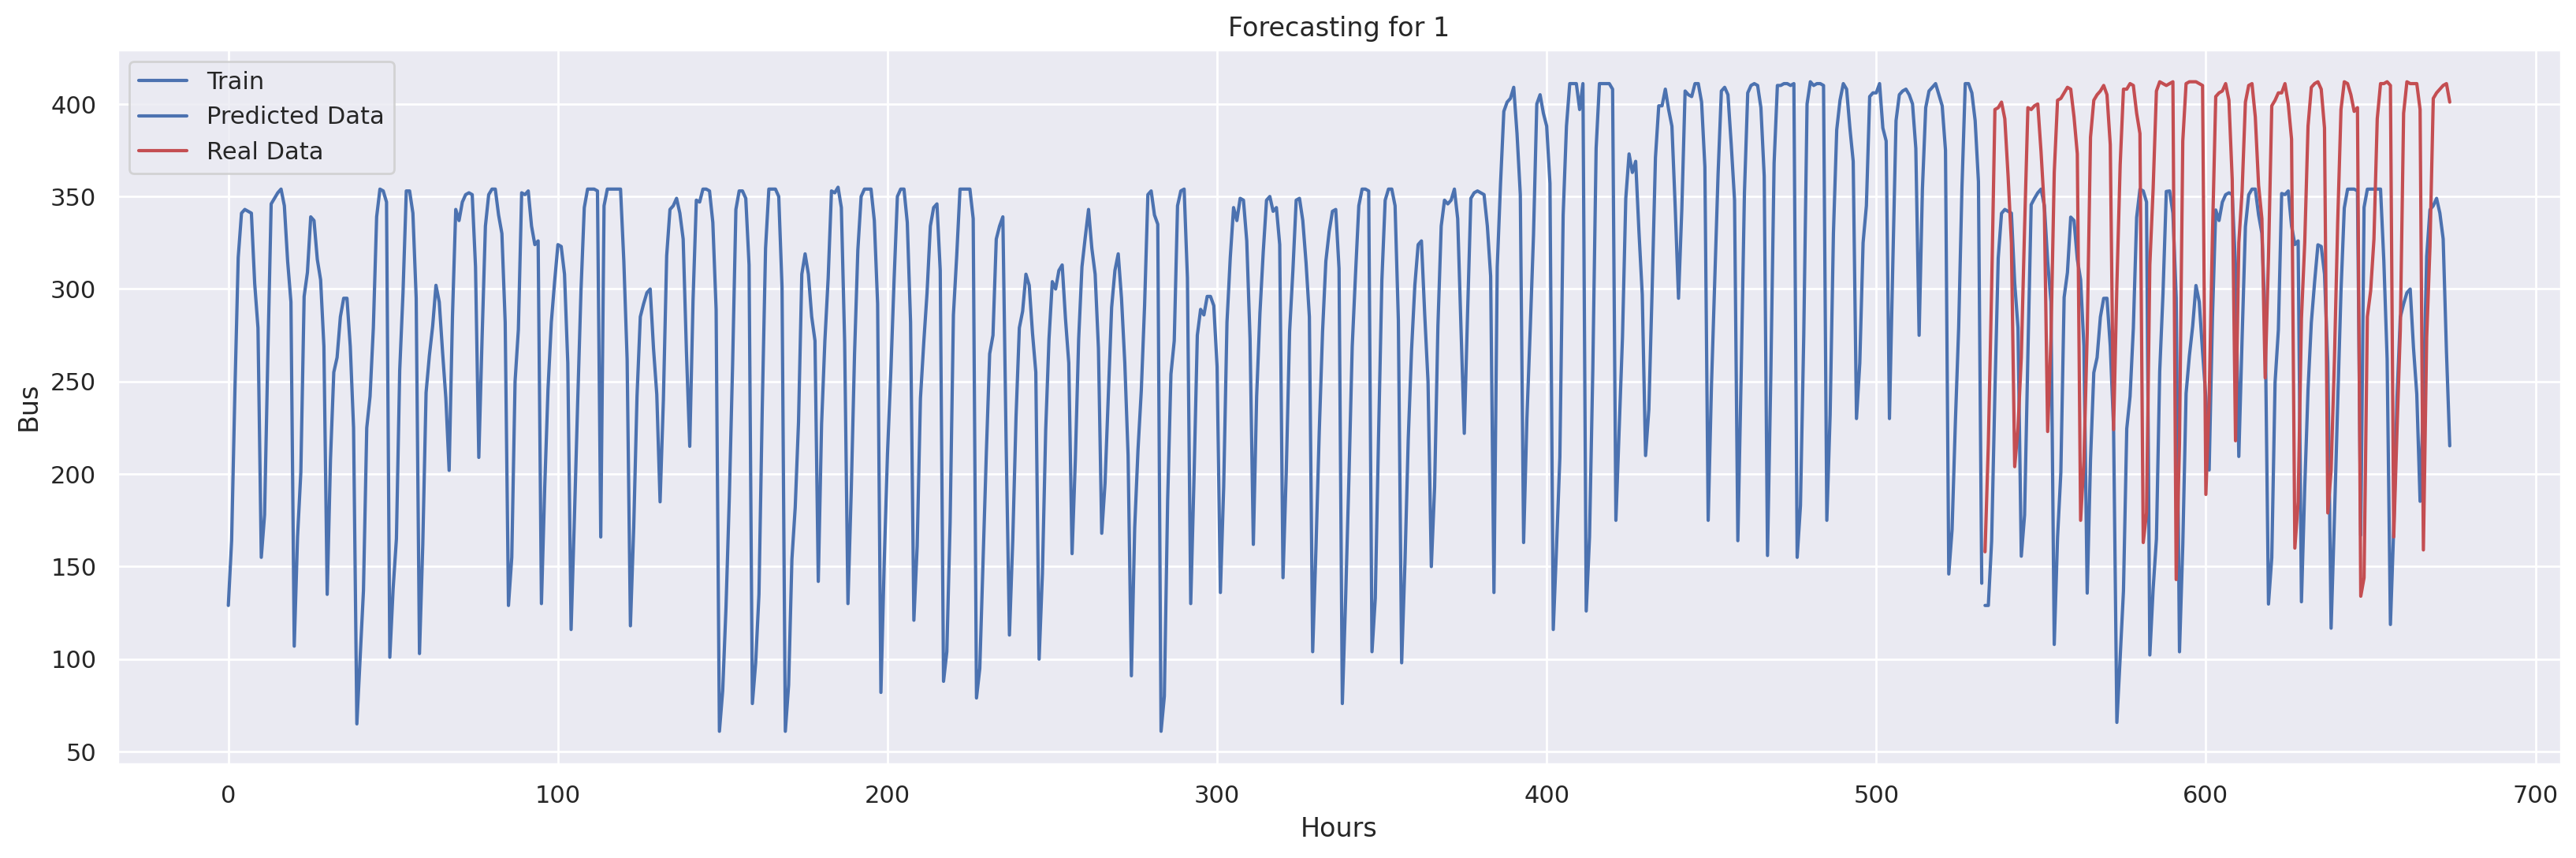

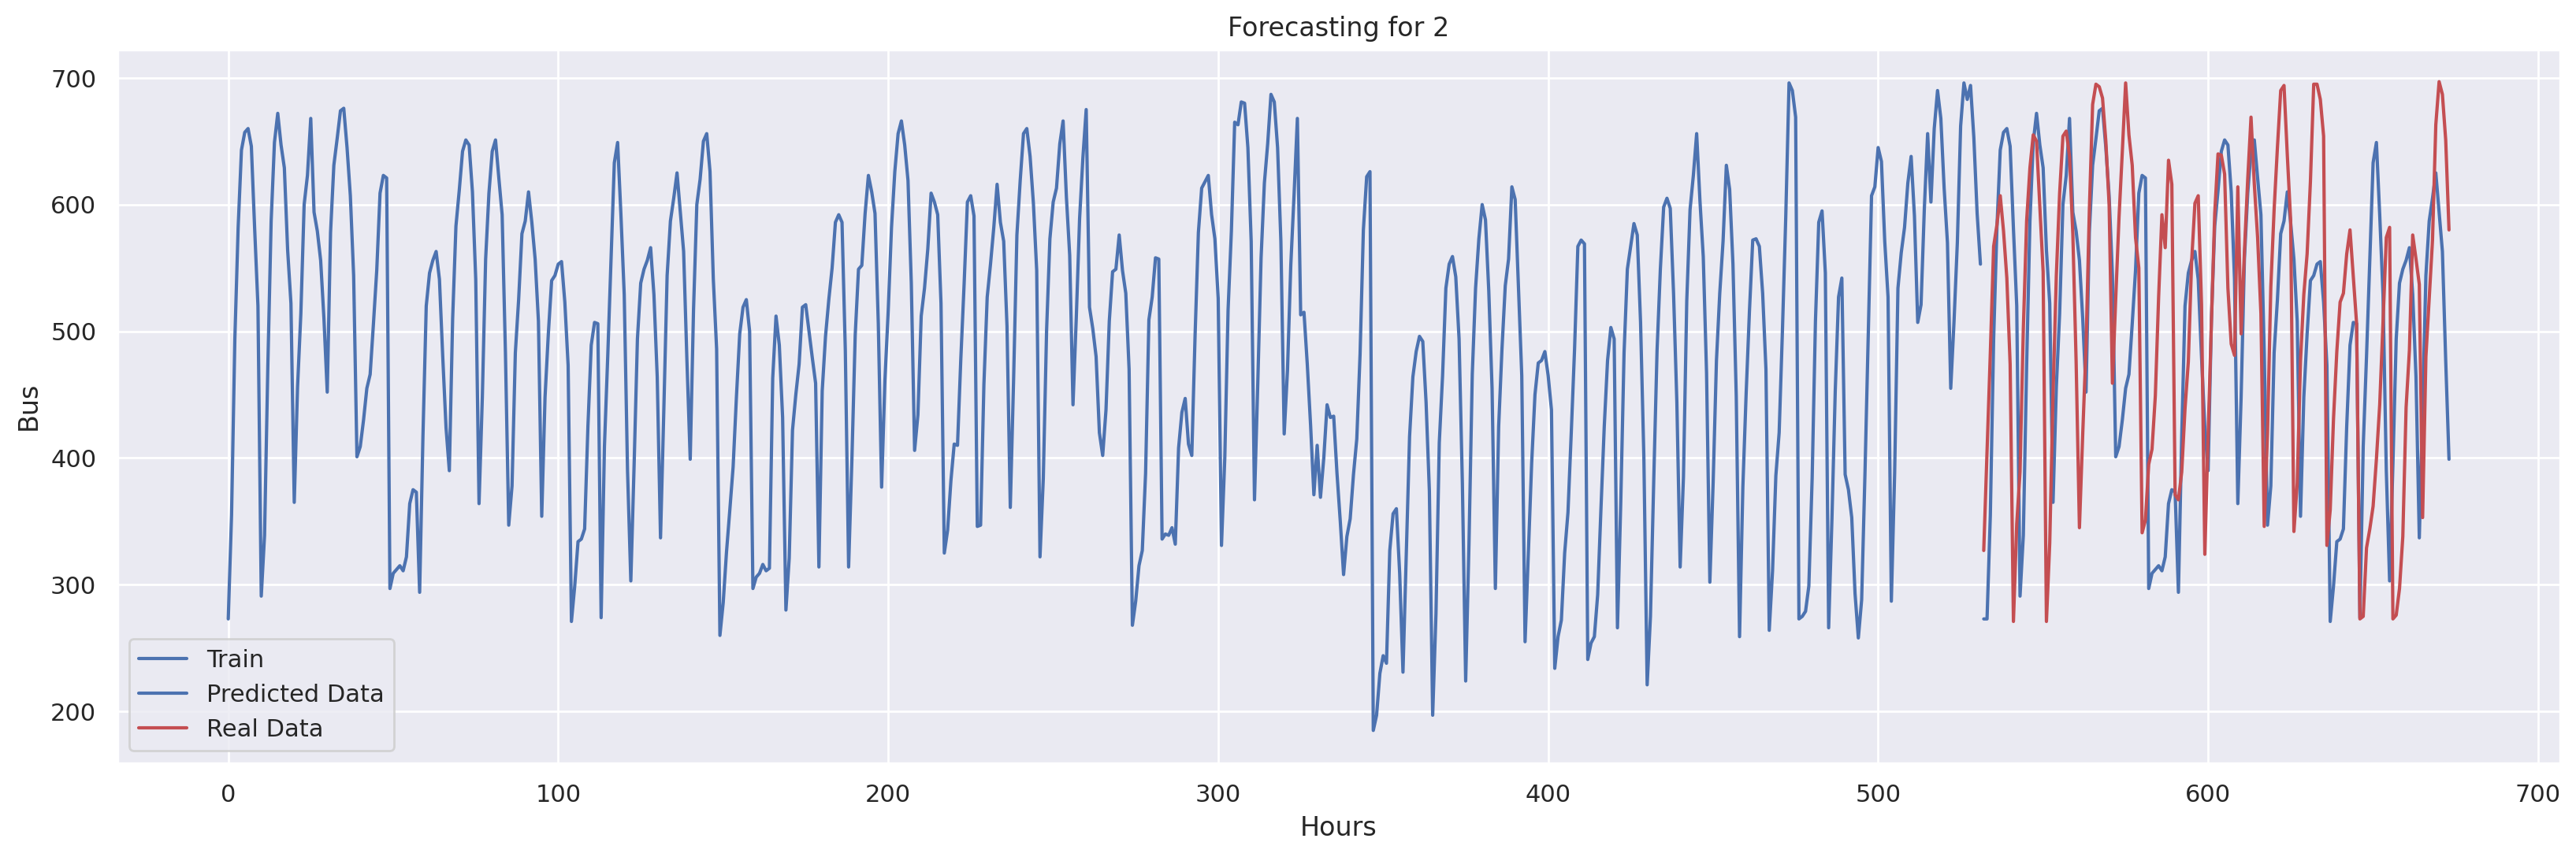

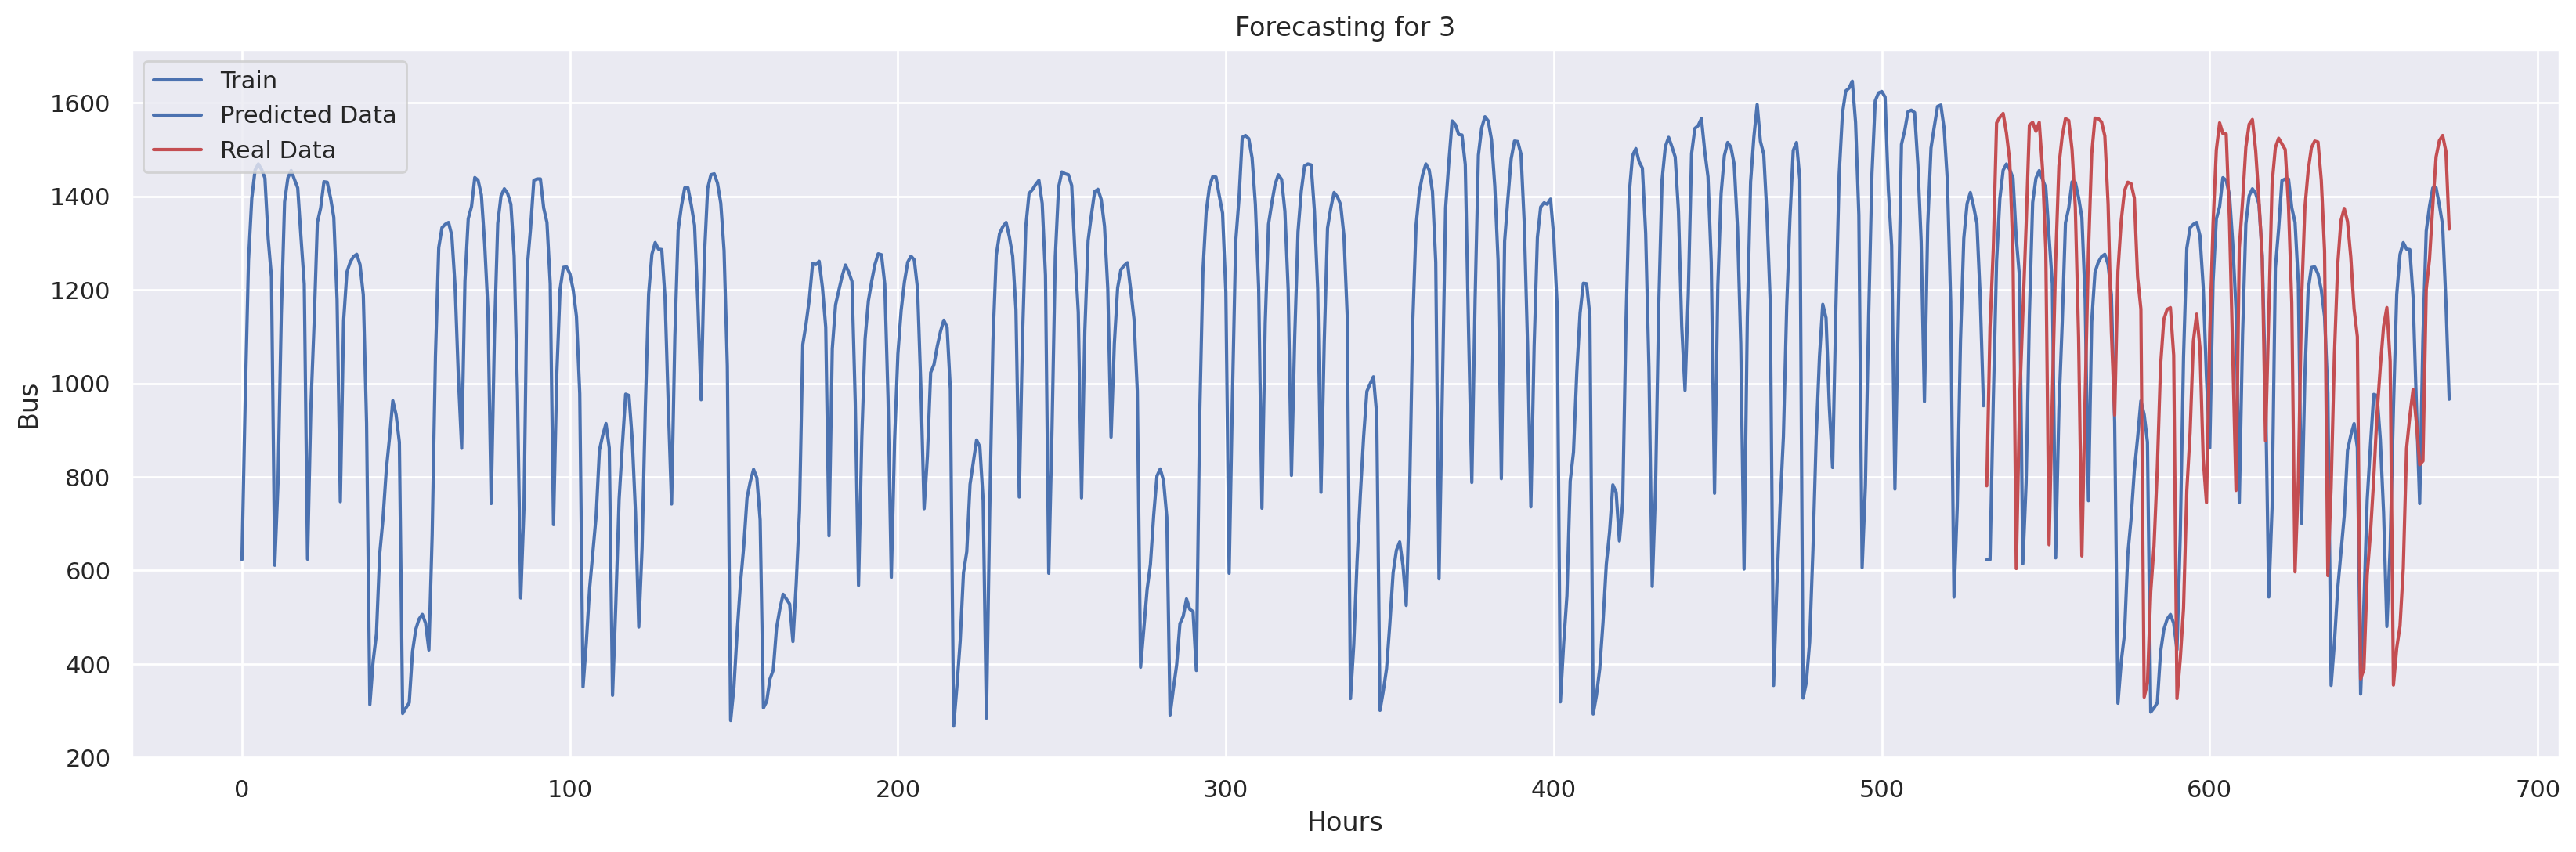

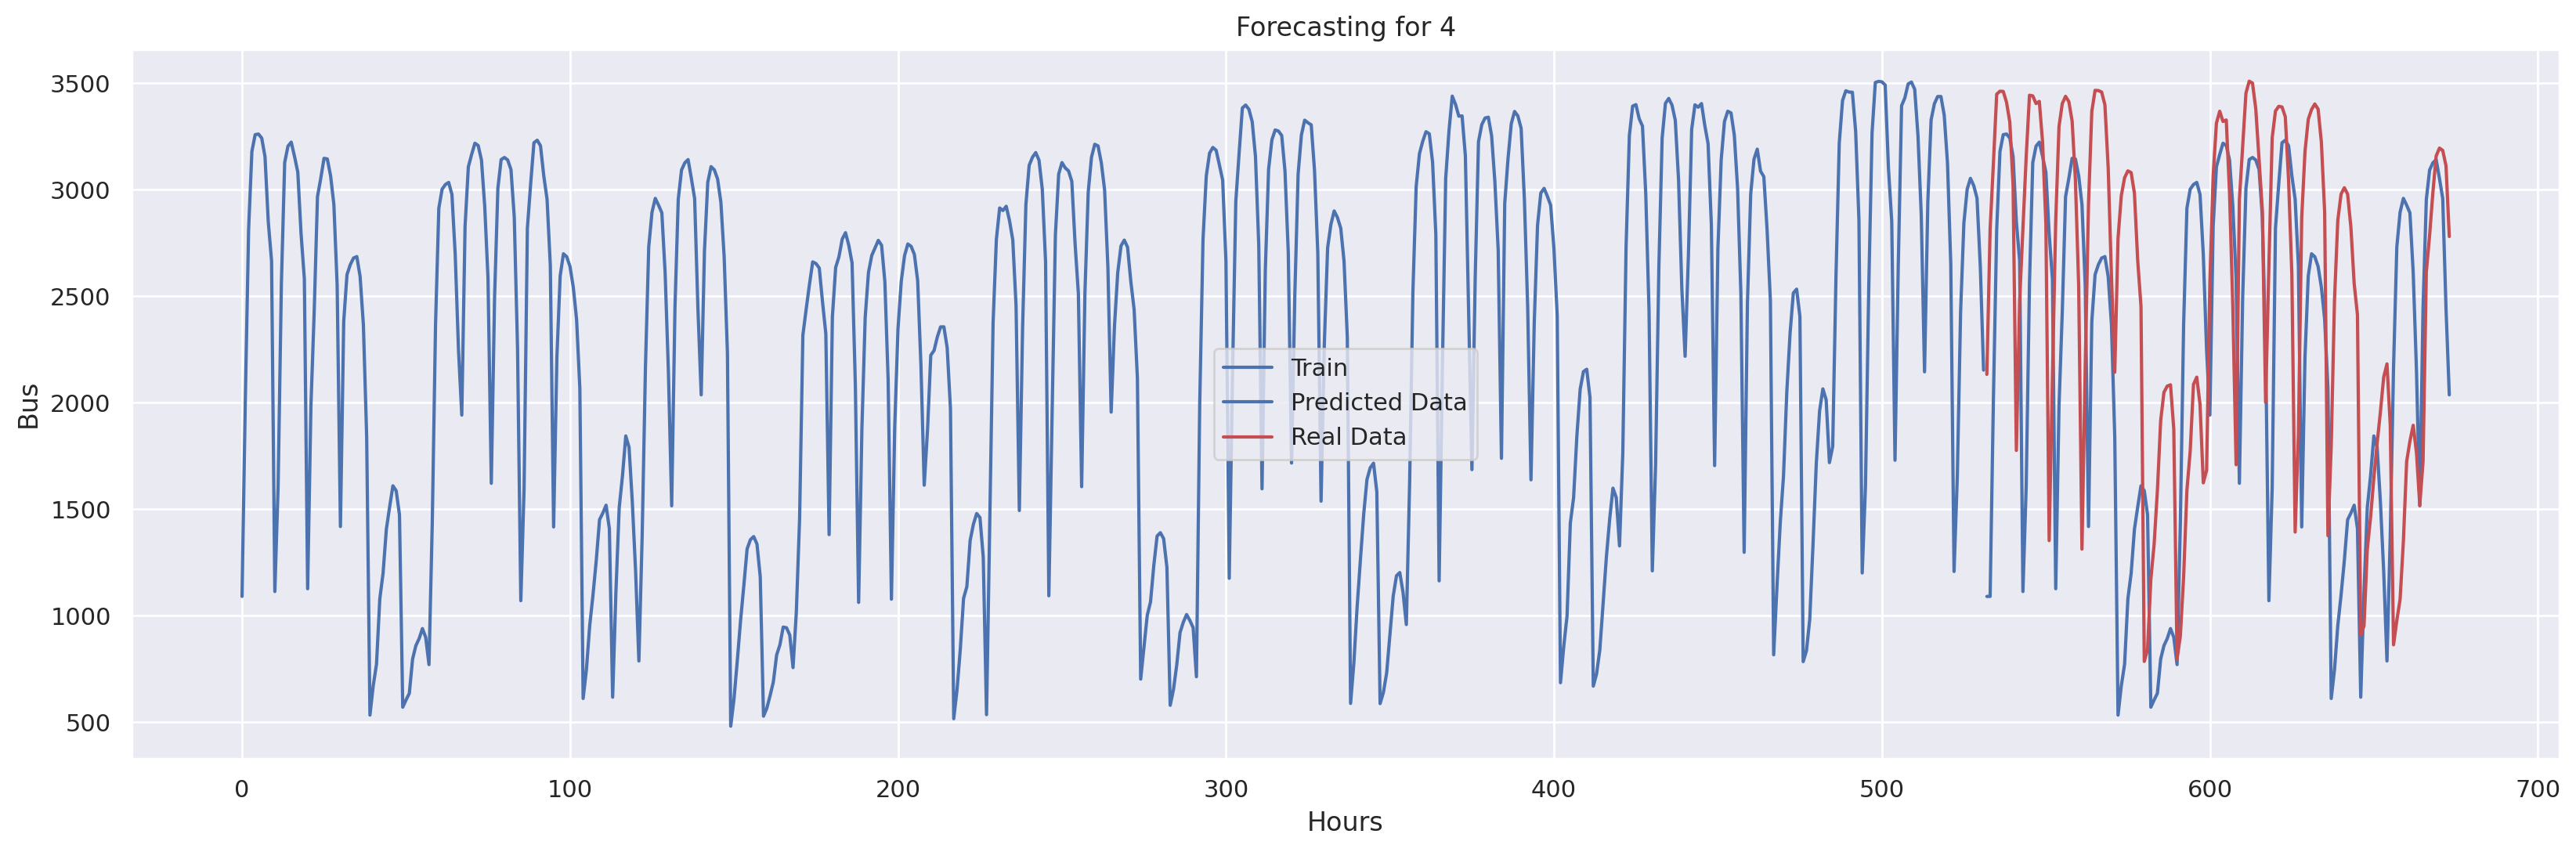

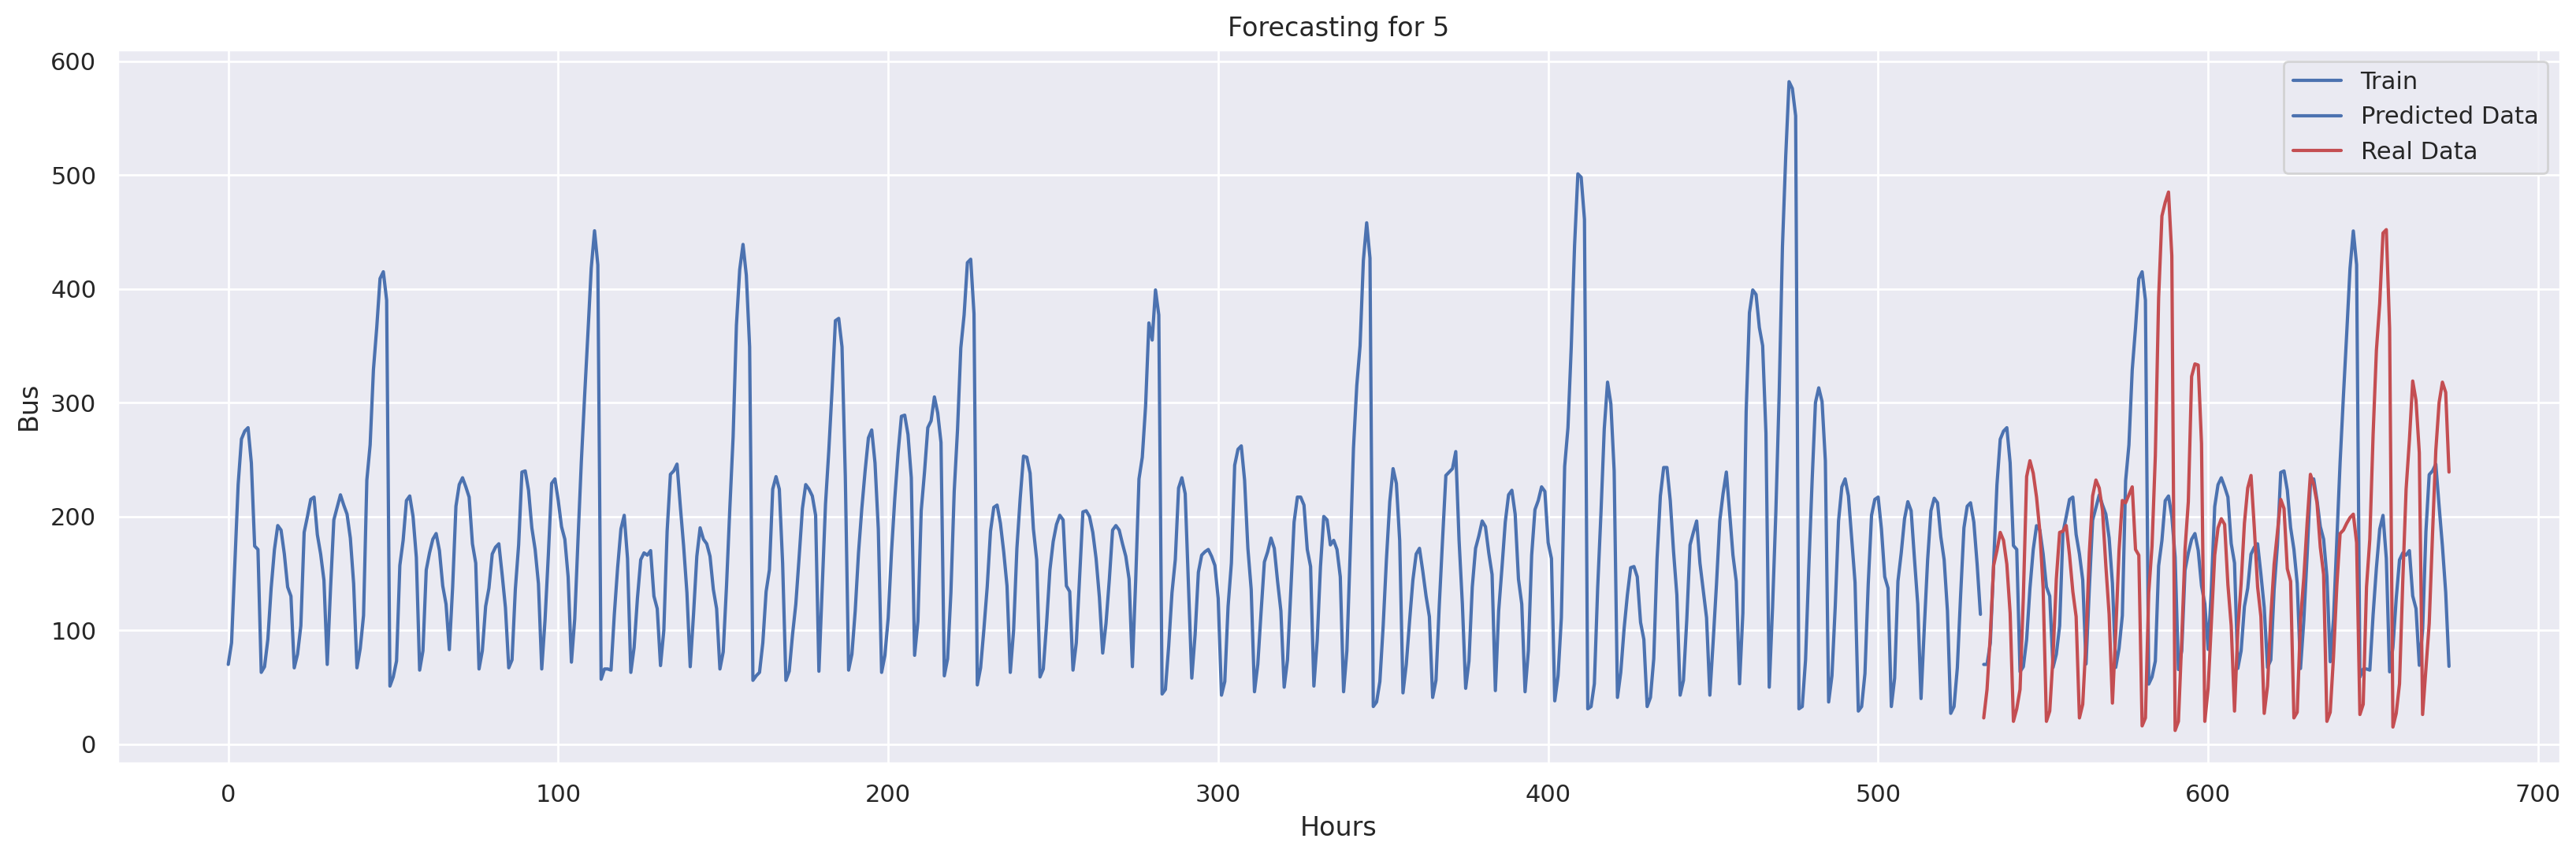

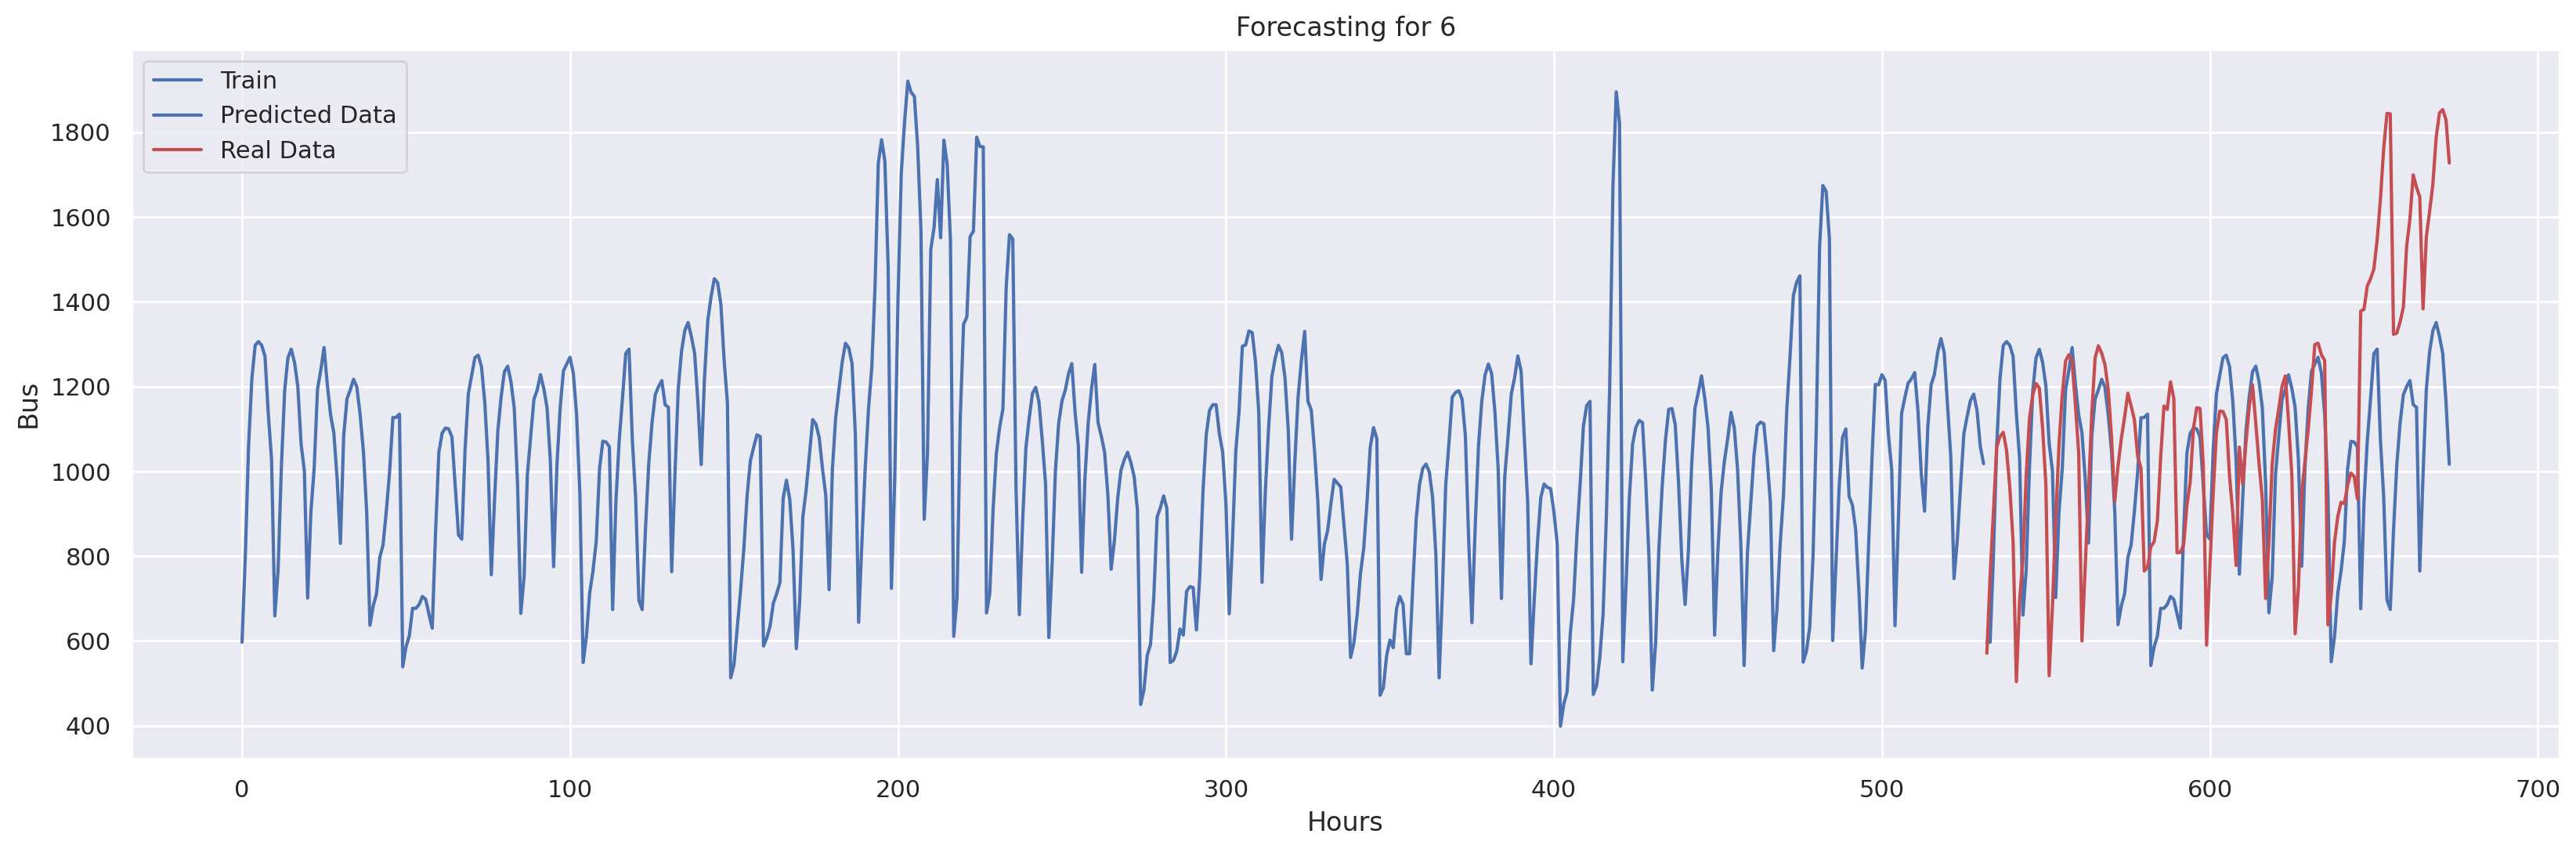

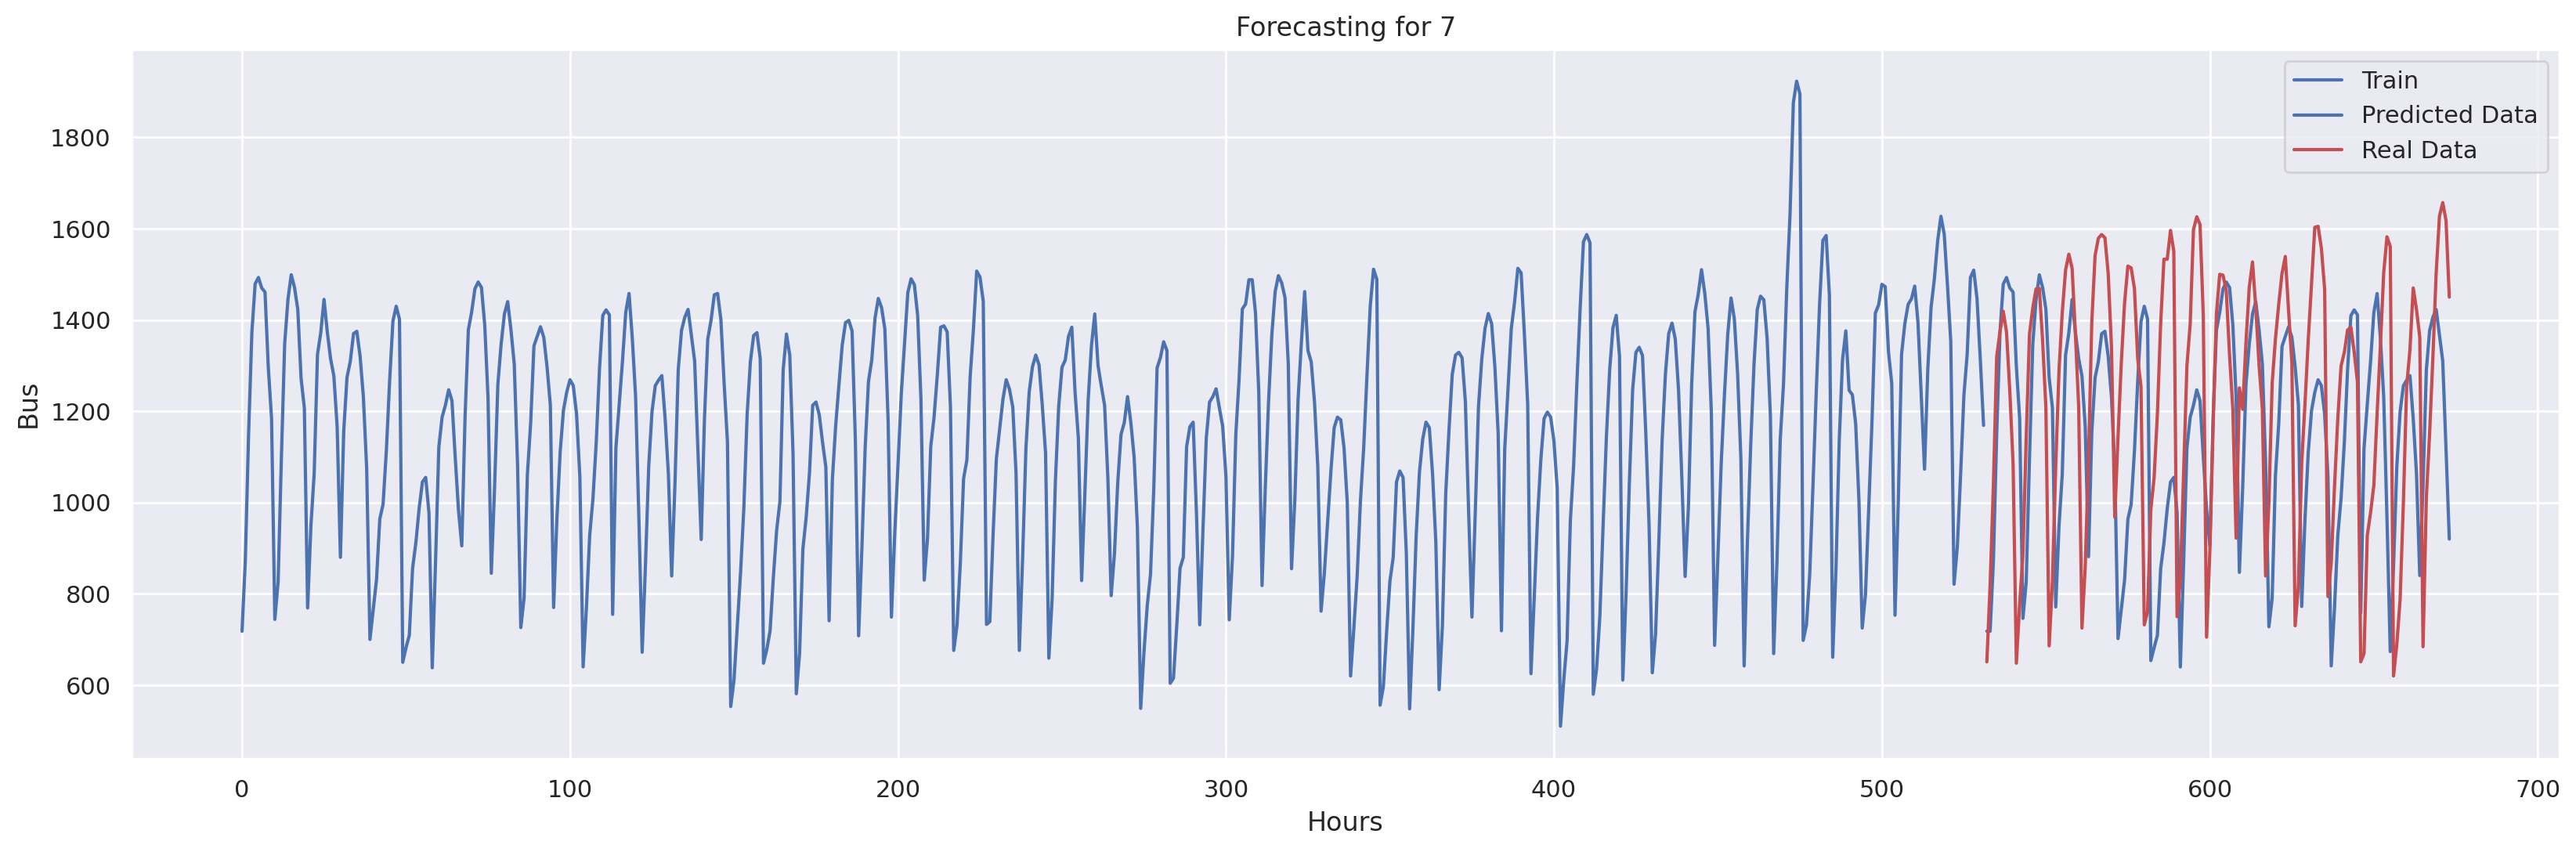

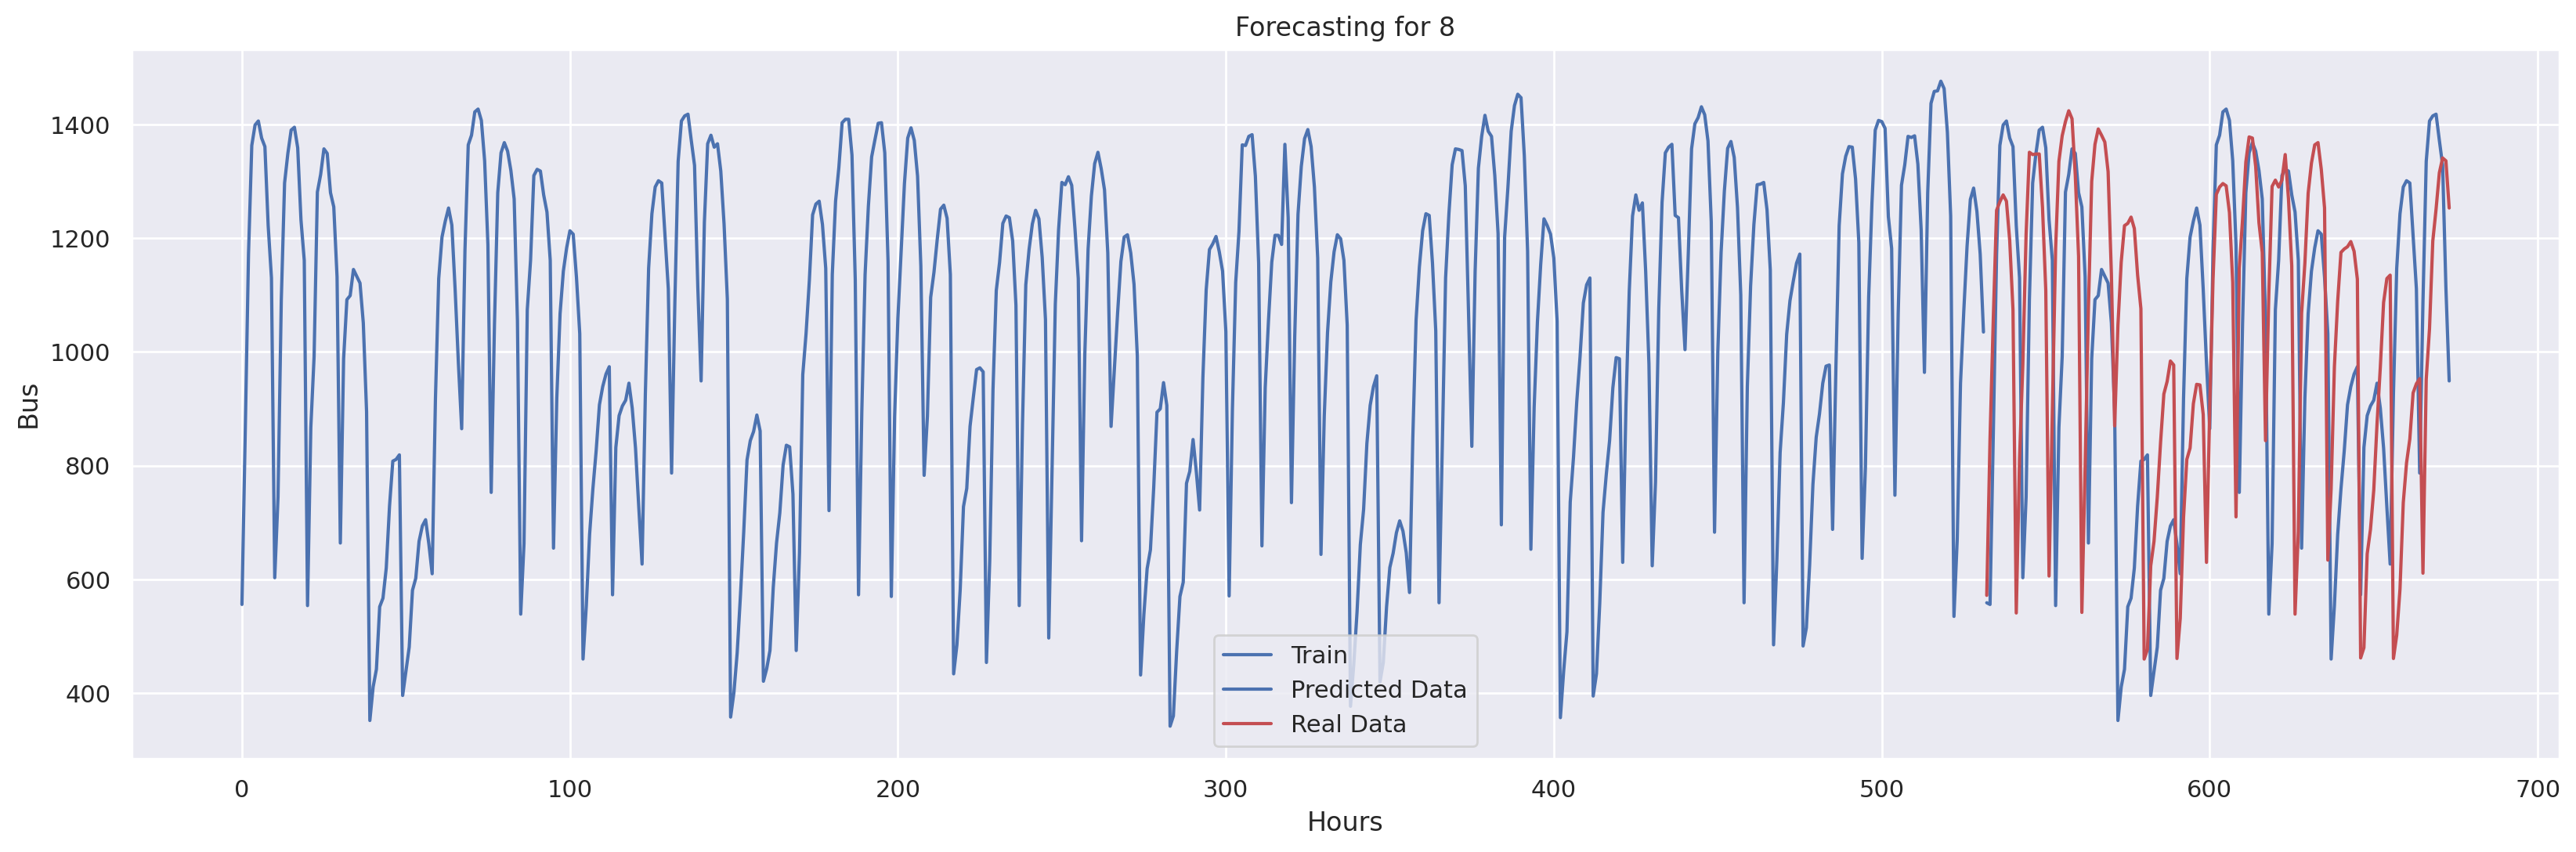

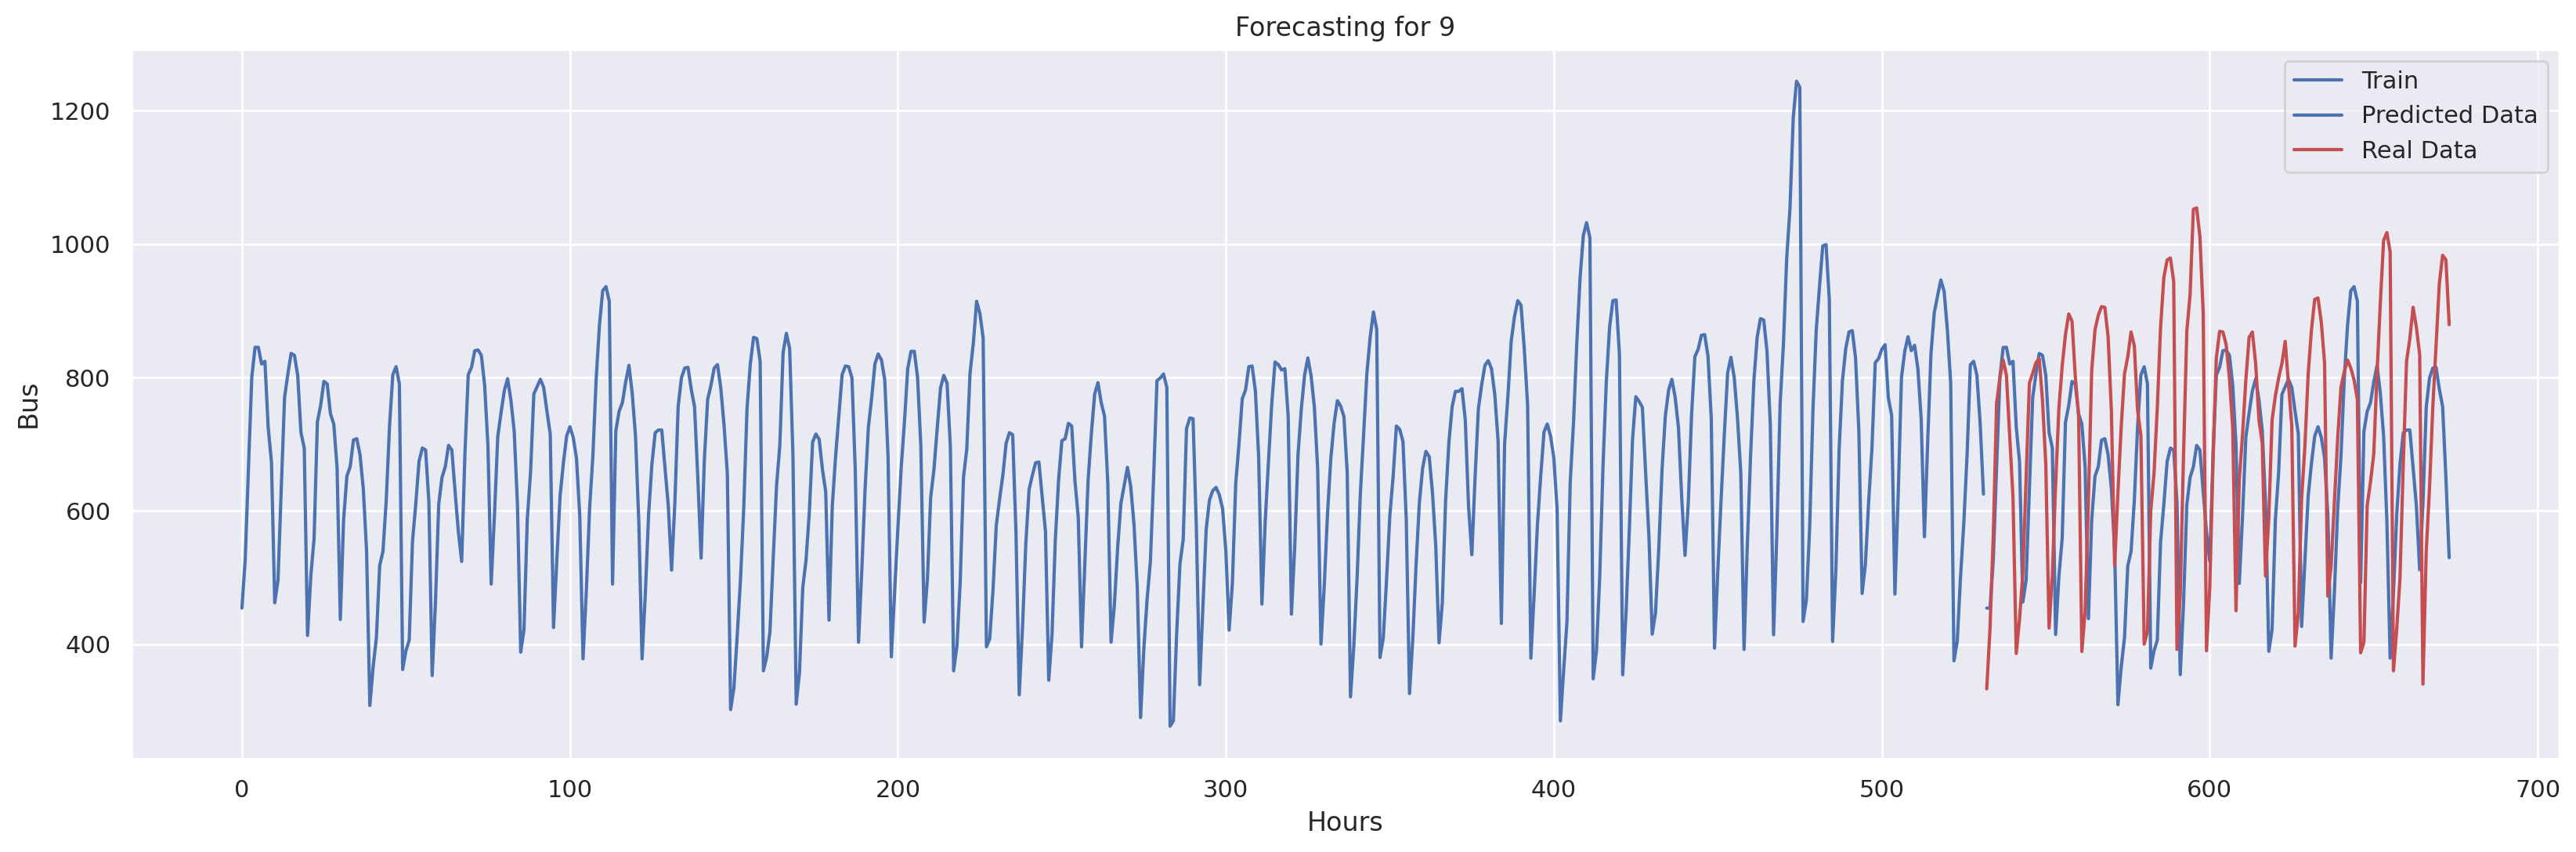

In [16]:
from statsmodels.base.model import Model

for i in sorted(df.municipality_id.unique()):
  train_1=train[train['municipality_id']==i]
  test_1=test[test['municipality_id']==i] 
  train_fin = train_1.groupby([pd.Grouper(key='timestamp', freq='H'), 'municipality_id'], as_index=False)['usage'].max()
  test_fin = test_1.groupby([pd.Grouper(key='timestamp', freq='H'), 'municipality_id'], as_index=False)['usage'].max()
  Exp = ExponentialSmoothing(train_fin["usage"], trend=None, seasonal=None, seasonal_periods=None)
  Exp = Exp.fit(optimized=True, use_boxcox=False, remove_bias=False)
  pred0 = Exp.predict(start=test_fin["usage"].index[0], end=test_fin["usage"].index[-1])
  pred0.index += len(train_fin)
  test_fin.index += len(train_fin)
  plt.figure(figsize=(20, 6), dpi=200);plt.plot(train_fin["usage"].index, train_fin["usage"], 
                                                label='Train'); plt.plot(pred0.index, pred0, 'b-', label = 'Predicted Data'); plt.plot(test_fin["usage"].index, test_fin["usage"], 'r-', label = 'Real Data'); plt.xlabel('Hours'); plt.ylabel('Bus'); plt.title('Forecasting for {i}'
     .format( i =i)); plt.legend(loc="best");
  print(' RMSE '+' for :'+str(i) +' is ' + str(np.sqrt(mean_squared_error(test_fin["usage"], pred0))))

In [ ]:

for i in sorted(df.municipality_id.unique()):

  train_1=train[train['municipality_id']==i]
  test_1=test[test['municipality_id']==i] 
  train_fin = train_1.groupby([pd.Grouper(key='timestamp', freq='H'), 'municipality_id'], as_index=False)['usage'].max()
  stepwise_model = auto_arima(train_fin.usage, start_p=1, start_q=1, max_p=4, max_q=4, m=10,
                            start_P=0, seasonal=True, d=1, D=1, trace=True,
                            error_action='ignore', suppress_warnings=True, stepwise=True)
  results = stepwise_model.fit(train_fin.usage,) # no output on convergence information if negative
  test_fin = test_1.groupby([pd.Grouper(key='timestamp', freq='H'), 'municipality_id'], as_index=False)['usage'].max()
  prediction = results.predict(steps=142)
  print(len(prediction))



Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[10]             : AIC=inf, Time=1.28 sec
 ARIMA(0,1,0)(0,1,0)[10]             : AIC=6933.251, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[10]             : AIC=6873.564, Time=0.44 sec
 ARIMA(0,1,1)(0,1,1)[10]             : AIC=inf, Time=1.36 sec
 ARIMA(1,1,0)(0,1,0)[10]             : AIC=6916.223, Time=0.06 sec
 ARIMA(1,1,0)(2,1,0)[10]             : AIC=6857.125, Time=0.94 sec
 ARIMA(1,1,0)(2,1,1)[10]             : AIC=inf, Time=3.20 sec
 ARIMA(1,1,0)(1,1,1)[10]             : AIC=inf, Time=1.41 sec
 ARIMA(0,1,0)(2,1,0)[10]             : AIC=6860.054, Time=0.70 sec
 ARIMA(2,1,0)(2,1,0)[10]             : AIC=6851.734, Time=1.19 sec
 ARIMA(2,1,0)(1,1,0)[10]             : AIC=6867.441, Time=0.64 sec
 ARIMA(2,1,0)(2,1,1)[10]             : AIC=inf, Time=4.67 sec
 ARIMA(2,1,0)(1,1,1)[10]             : AIC=inf, Time=2.27 sec
 ARIMA(3,1,0)(2,1,0)[10]             : AIC=6826.240, Time=1.45 sec
 ARIMA(3,1,0)(1,1,0)[10]             : AIC=6846.9

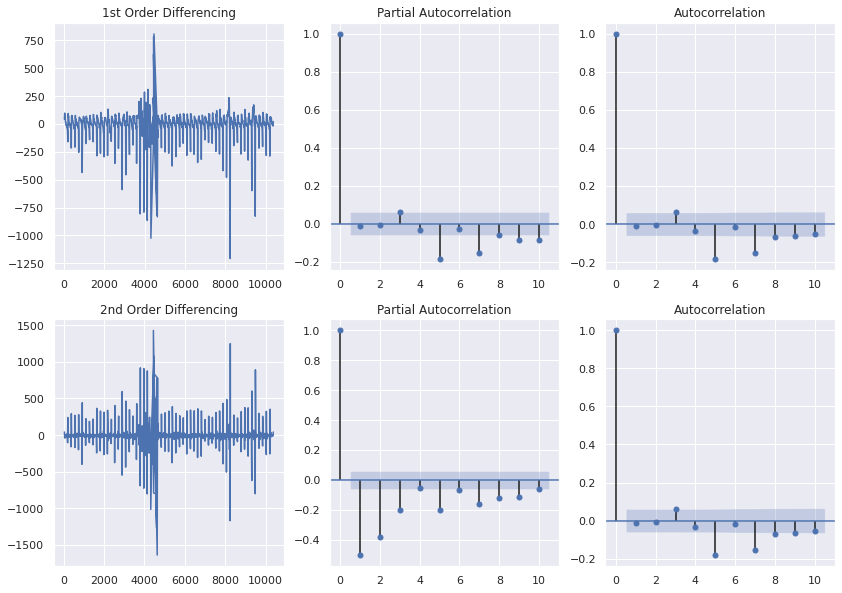

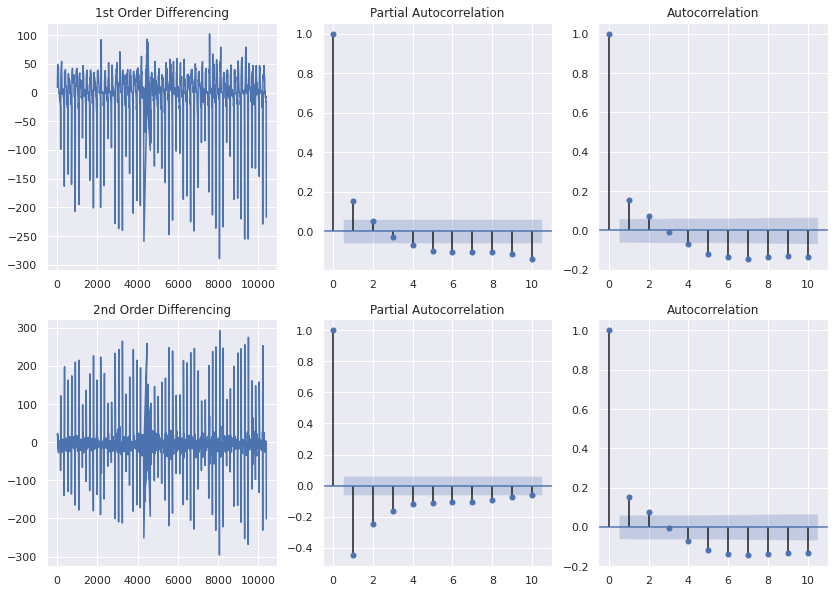

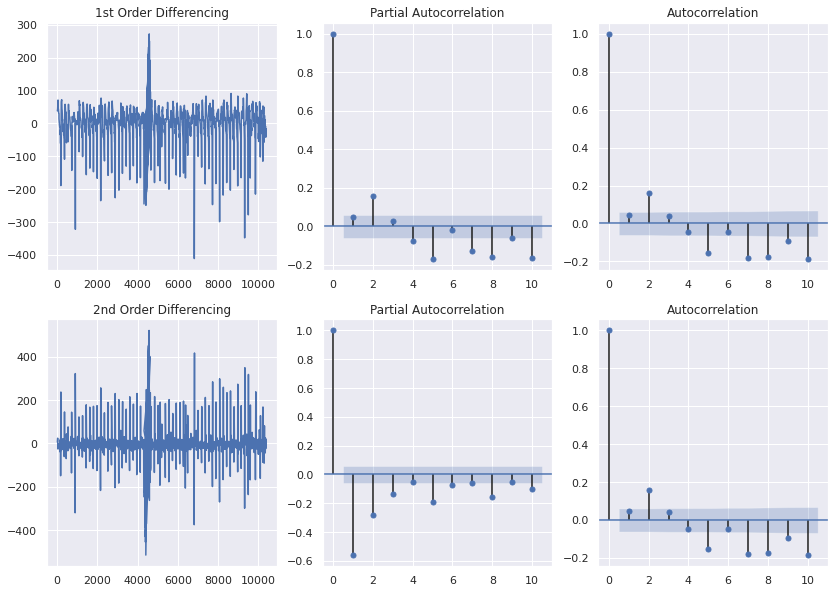

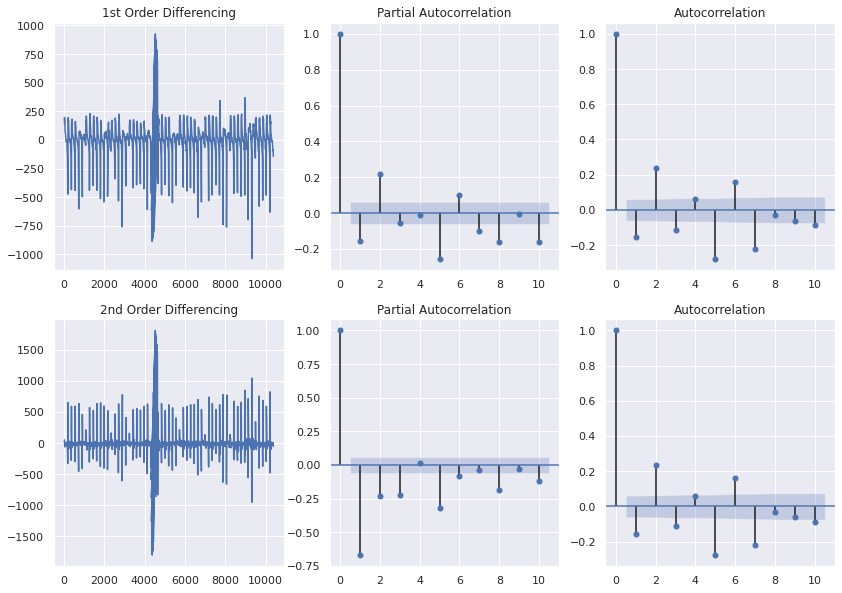

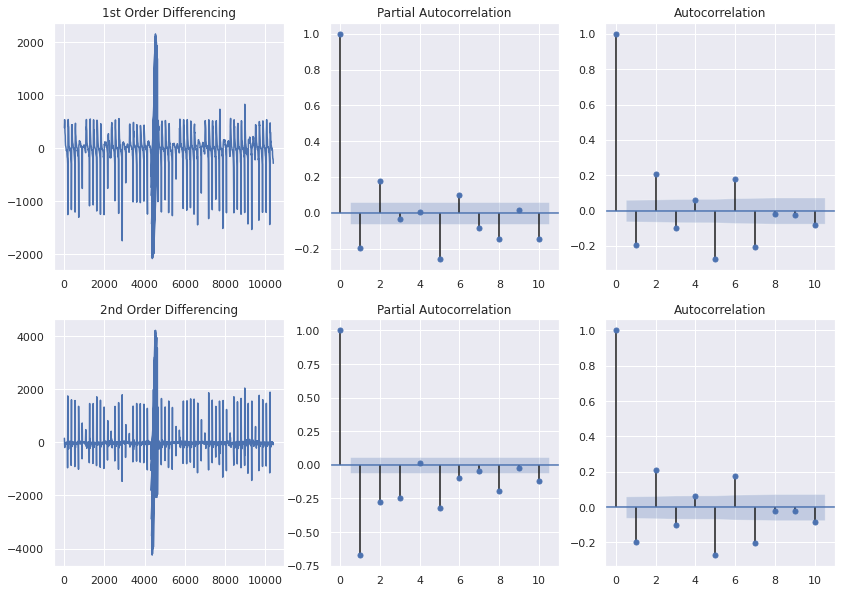

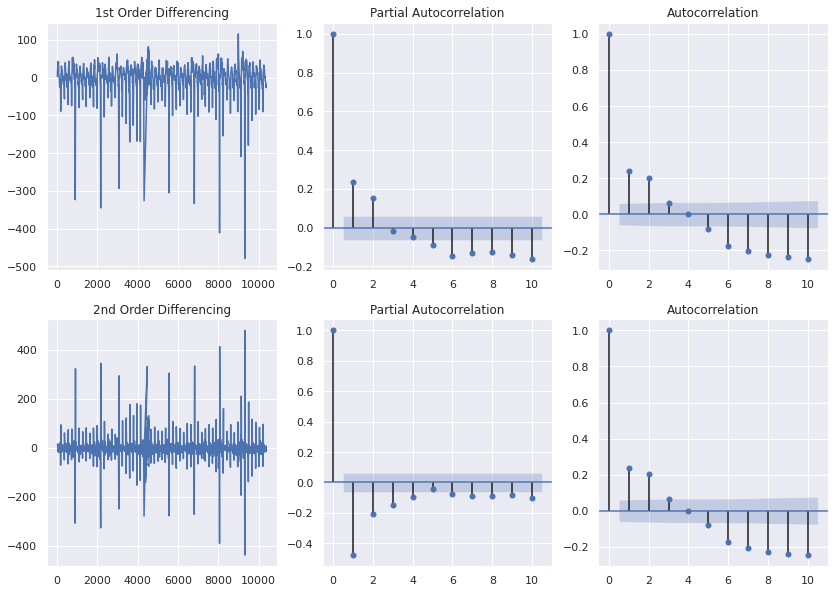

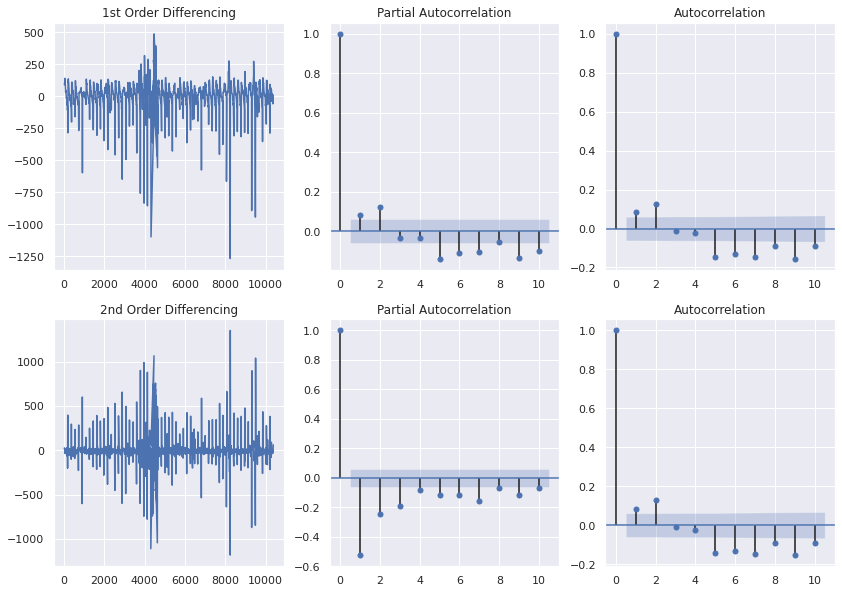

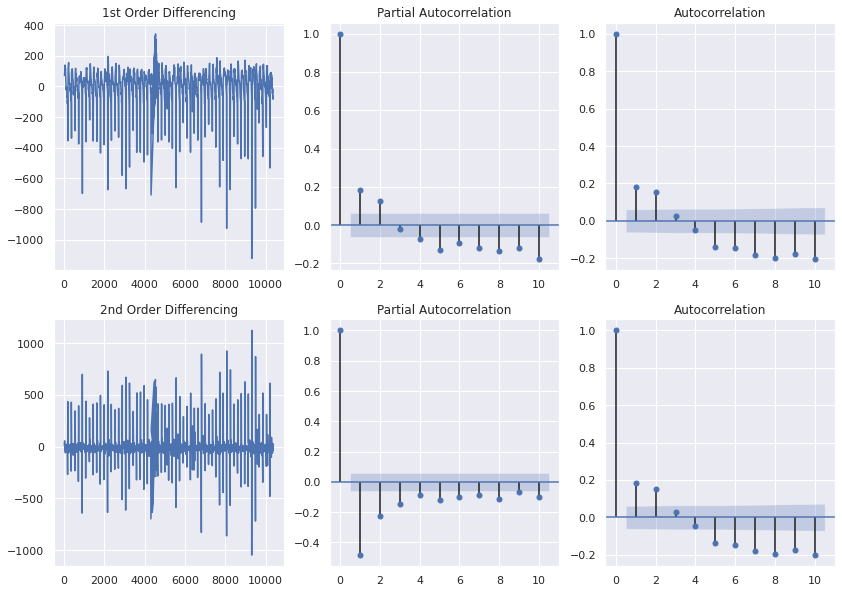

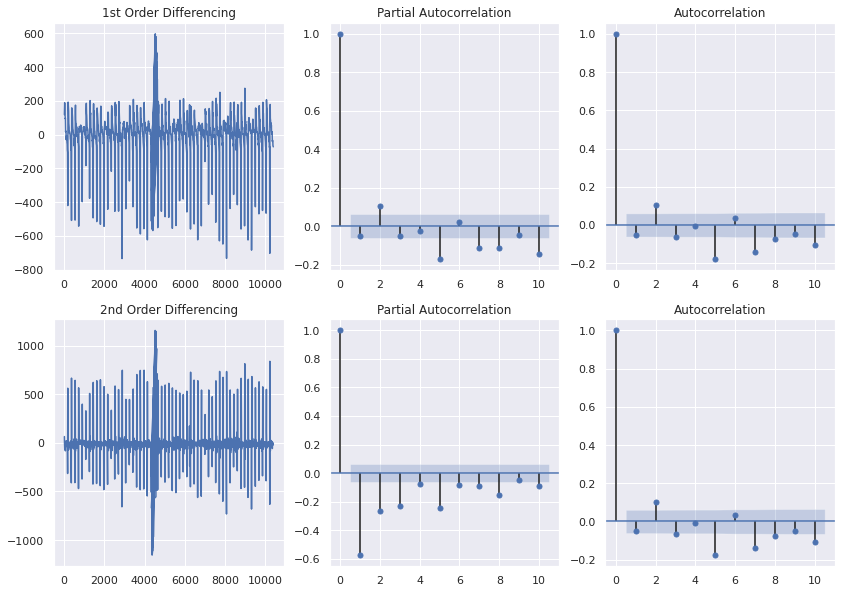

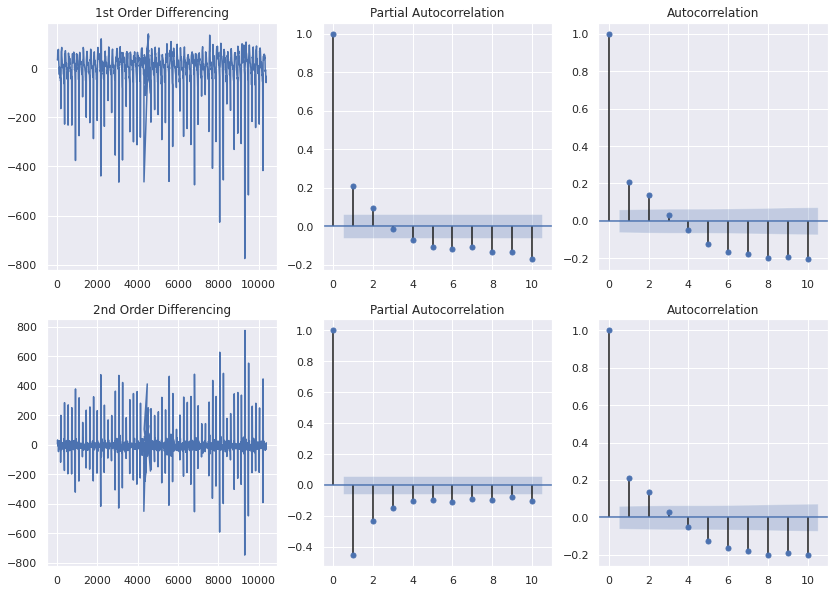

In [ ]:

for i in sorted(df.municipality_id.unique()):
  train_1=train[train['municipality_id']==i]
  test_1=test[test['municipality_id']==i] 
  train_fin = train_1.groupby([pd.Grouper(key='timestamp', freq='H'), 'municipality_id'], as_index=False)['usage'].max()
# 1st differencing
  fig, axes = plt.subplots(2, 3, figsize=(14,10), sharex=False)
  axes[0, 0].plot(train_1.usage.diff()); axes[0, 0].set_title('1st Order Differencing')
  plot_pacf(train_1.usage.diff().dropna(), ax=axes[0, 1], lags=10)
  plot_acf(train_1.usage.diff().dropna(), ax=axes[0, 2], lags=10)

# 2nd Differencing
  axes[1, 0].plot(train_1.usage.diff().diff()); axes[1, 0].set_title('2nd Order Differencing')
  plot_pacf(train_1.usage.diff().diff().dropna(), ax=axes[1, 1], lags=10)
  plot_acf(train_1.usage.diff().dropna(), ax=axes[1, 2], lags=10)
  plt.show()   
